# Análise SIH 


   ### Fonte: Datasus
   #### Objetivo: Entender a distribuição de raça ,  idade e   hospital dos códigos de procedimentos de parto pelos 4 tipos de categorias:  *Humanizado, Rede Cegonha, Universitário, Não Rede Cegonha*
   
   - Códigos:
   
0310010039 - PARTO NORMAL 

020203109  - REAÇÃO DE HEMAGLUTINAÇÃO (TPHA) P/ DIAGNÓSTICO DA SIFILIS  
0310010047 - PARTO NORMAL EM GESTACAO DE ALTO RISCO   
0310010055 - PARTO NORMAL EM CENTRO DE PARTO NORMAL (CPN) 

0411010026 - PARTO CESARIANO EM GESTACAO DE ALTO RISCO   
0411010034 - PARTO CESARIANO  
0411010042 - PARTO CESARIANO COM LAQUEADURA TUBARIA   
0411020048 - TRATAMENTO CIRÚRGICO DE GRAVIDEZ ECTÓPICA   
021401004  - TESTE RÁPIDO PARA DETECÇÃO DE HIV EM GESTANTE   


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import plotly.offline as py
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objs as go
import cufflinks as cf
import glob
import os

py.init_notebook_mode(connected=True)

%matplotlib inline

###### Carregando os arquivos csv

2020

In [2]:
path='D:\Documentos\Data_Labe\Dados-Reportagem\AnaliseDados_SIHPartos\dados-base/2020'

In [3]:
files_2020 = glob.glob(os.path.join(path, "*.csv"))

In [4]:
dados_2020  = pd.concat(map(lambda file: pd.read_csv(file, encoding='latin-1', sep=',', low_memory=False, usecols=['PROC_SOLIC', 'CNES', 'RACA_COR', 'IDADE', 'CEP', 'ANO_CMPT', 'MES_CMPT']), files_2020))

In [5]:
dados_2020.head()

,ANO_CMPT,MES_CMPT,CEP,PROC_SOLIC,IDADE,CNES,RACA_COR
0,2020,1,21340170,303080060,7,2273411,1
1,2020,1,23094091,303010061,7,2273411,3
2,2020,1,22730170,303140151,9,2273411,2
3,2020,1,21555000,303140151,2,2273411,3
4,2020,1,21555000,303150050,1,2273411,3


In [6]:
dados_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 326084 entries, 0 to 50295
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   ANO_CMPT    326084 non-null  int64
 1   MES_CMPT    326084 non-null  int64
 2   CEP         326084 non-null  int64
 3   PROC_SOLIC  326084 non-null  int64
 4   IDADE       326084 non-null  int64
 5   CNES        326084 non-null  int64
 6   RACA_COR    326084 non-null  int64
dtypes: int64(7)
memory usage: 19.9 MB


2019

In [7]:
path_19='D:\Documentos\Data_Labe\Dados-Reportagem\AnaliseDados_SIHPartos\dados-base/2019'

In [8]:
files_2019 = glob.glob(os.path.join(path_19, "*.csv"))

In [9]:
dados_2019  = pd.concat(map(lambda file: pd.read_csv(file, encoding='latin-1', sep=',', low_memory=False, usecols=['PROC_SOLIC', 'CNES', 'RACA_COR', 'IDADE', 'CEP', 'ANO_CMPT', 'MES_CMPT']), files_2019))

In [10]:
dados_2019.head()

,ANO_CMPT,MES_CMPT,CEP,PROC_SOLIC,IDADE,CNES,RACA_COR
0,2019,1,20220480,303170107,46,2291304,3
1,2019,1,20211100,303170107,36,2291304,1
2,2019,1,20941160,303170107,31,2291304,3
3,2019,1,20220480,303170107,27,2291304,3
4,2019,1,20220620,304100013,64,2295067,3


In [11]:
dados_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 754686 entries, 0 to 58873
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   ANO_CMPT    754686 non-null  int64
 1   MES_CMPT    754686 non-null  int64
 2   CEP         754686 non-null  int64
 3   PROC_SOLIC  754686 non-null  int64
 4   IDADE       754686 non-null  int64
 5   CNES        754686 non-null  int64
 6   RACA_COR    754686 non-null  int64
dtypes: int64(7)
memory usage: 46.1 MB


In [12]:
dados = pd.concat([dados_2019,dados_2020])

In [13]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1080770 entries, 0 to 50295
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype
---  ------      --------------    -----
 0   ANO_CMPT    1080770 non-null  int64
 1   MES_CMPT    1080770 non-null  int64
 2   CEP         1080770 non-null  int64
 3   PROC_SOLIC  1080770 non-null  int64
 4   IDADE       1080770 non-null  int64
 5   CNES        1080770 non-null  int64
 6   RACA_COR    1080770 non-null  int64
dtypes: int64(7)
memory usage: 66.0 MB


 *Carregando arquivos com cnes identificados*

In [14]:
# Carregando arquivos com cnes identificados
cnesIdent = pd.read_csv('dados-base/estabelecimentos2.csv', sep=';', usecols=['MUNICIPIO', 'CNES', 'NOME FANTASIA', 'RAZAO SOCIAL', 'TIPO GESTAO','BAIRRO'])

In [15]:
cnesIdent

,MUNICIPIO,CNES,NOME FANTASIA,RAZAO SOCIAL,TIPO GESTAO,BAIRRO
0,PORTO REAL,7084048,ERLEI OLIVEIRA ANDRADE MEDICINA E ANESTESIA LTDA,ERLEI OLIVEIRA ANDRADE MEDICINA E ANESTESIA LTDA,M,CENTRO
1,MACAE,5545749,JOAO BATISTA DE SOUZA JUNIOR,JOAO BATISTA DE SOUZA JUNIOR,M,IMBETIBA
2,RIO DE JANEIRO,5546583,SMS CMS CATIRI AP 51,SMS RIO CMS CATIRI AP 51,M,BANGU
3,RIO DE JANEIRO,5546591,SMS CF MARIA JOSE DE SOUSA BARBOSA AP 51,SMS RIO CF MARIA JOSE DE SOUSA BARBOSA AP 51,M,BANGU
4,PINHEIRAL,2271141,HOSPITAL MUNICIPAL DE PINHEIRAL AURELINO GONCA...,MUNICIPIO DE PINHEIRAL,M,CENTRO
...,...,...,...,...,...,...
19648,RIO DE JANEIRO,9567712,PSICOLOGIA ESSENCIAL,PSICOLOGIA ESSENCIAL EIRELI,M,DEL CASTILHO
19649,RIO DE JANEIRO,9151230,ELIEL FIGUEIREDO LABORTORIO E IMAGEM CACHAMBI,LABORATORIOS MEDICOS DR ELIEL FIGUEIREDO LTDA,M,CACHAMBI
19650,SAO GONCALO,250309,POLICLINICA GONCALENSE CAZUZA,SECRETARIA MUNICIPAL DE SAUDE DE SAO GONCALO,M,PARADA 40
19651,RIO DE JANEIRO,7763573,CLINICA DERMATOLOGICA DRA FERNANDA SANCHEZ,CLINICA DERMATOLOGICA DRA FERNANDA SANCHEZ EIREL,M,BARRA DA TIJUCA


 *Carregando arquivo dos cnes categorizados*
 
Categorias:

- Humanizado
- Rede Cegonha
- Universitário
- Não Rede Cegonha

In [15]:
cnesCategorizado = pd.read_csv('dados-base/cnes-unicos-mun-rio.csv')

In [16]:
# Visualizando os dados do DataFrame
cnesCategorizado.head()

,ESTABELECIMENTO,CATEGORIA
0,NaN,NaN
1,MS HGB HOSPITAL GERAL DE BONSUCESSO,CEGONHA
2,SMS RIO HOSPITAL MATERNIDADE ALEXANDER FLEMING,CEGONHA
3,SMS RIO HOSPITAL MATERNIDADE FERNANDO MAGALHAES,CEGONHA
4,SMS MATERNIDADE CARMELA DUTRA AP 32,CEGONHA


##### Limpando o dataframe com os dados SIH Partos de Jan-19 a Jun-20

 *Limpando os dados para análise temporal*

In [17]:
dados = pd.merge(dados, cnesIdent, on='CNES', how='left')

In [18]:
dados = dados.loc[dados['MUNICIPIO'] == 'RIO DE JANEIRO']

In [19]:
dados.nunique()

ANO_CMPT             2
MES_CMPT            12
CEP              43728
PROC_SOLIC        1531
IDADE              100
CNES                72
RACA_COR             6
MUNICIPIO            1
NOME FANTASIA       72
RAZAO SOCIAL        57
TIPO GESTAO          2
BAIRRO              47
dtype: int64

In [20]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 413664 entries, 0 to 1075716
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   ANO_CMPT       413664 non-null  int64 
 1   MES_CMPT       413664 non-null  int64 
 2   CEP            413664 non-null  int64 
 3   PROC_SOLIC     413664 non-null  int64 
 4   IDADE          413664 non-null  int64 
 5   CNES           413664 non-null  int64 
 6   RACA_COR       413664 non-null  int64 
 7   MUNICIPIO      413664 non-null  object
 8   NOME FANTASIA  413664 non-null  object
 9   RAZAO SOCIAL   413664 non-null  object
 10  TIPO GESTAO    413664 non-null  object
 11  BAIRRO         413664 non-null  object
dtypes: int64(7), object(5)
memory usage: 41.0+ MB


In [21]:
dicRACACOR = {
    1 : 'Branca',
    2 : 'Preta',
    3 : 'Parda',
    4 : 'Amarela',
    5 : 'Indígena',
    99 : "Sem informação"
}


dicMES = {
    1 : 'Janeiro',
    2 : 'Fevereiro',
    3 : 'Março',
    4 : 'Abril',
    5 : 'Maio',
    6: "Junho",
    7 : "Julho",
    8 : "Agosto",
    9 : "Setembro",
    10 : "Outubro",
    11 : 'Novembro',
    12: 'Dezembro'

}

dicPROC = {310010039: 'Parto Normal',
           310010047: 'Parto Normal - Risco',
           411010026:'Cesariana - Risco',
           411010034: 'Cesariana',
           411020048:'Ectopia',
           411010042: 'Laquiadura'
          }

dados = dados.replace({'RACA_COR' : dicRACACOR,'MES_CMPT': dicMES, 'PROC_SOLIC':dicPROC}) 

In [22]:
dados.head()

,ANO_CMPT,MES_CMPT,CEP,PROC_SOLIC,IDADE,CNES,RACA_COR,MUNICIPIO,NOME FANTASIA,RAZAO SOCIAL,TIPO GESTAO,BAIRRO
0,2019,Janeiro,20220480,303170107,46,2291304,Parda,RIO DE JANEIRO,SESDEC RJ CENTRO PSIQUIATRICO RIO DE JANEIRO,SECRETARIA DE ESTADO DE SAUDE SES,E,GAMBOA
1,2019,Janeiro,20211100,303170107,36,2291304,Branca,RIO DE JANEIRO,SESDEC RJ CENTRO PSIQUIATRICO RIO DE JANEIRO,SECRETARIA DE ESTADO DE SAUDE SES,E,GAMBOA
2,2019,Janeiro,20941160,303170107,31,2291304,Parda,RIO DE JANEIRO,SESDEC RJ CENTRO PSIQUIATRICO RIO DE JANEIRO,SECRETARIA DE ESTADO DE SAUDE SES,E,GAMBOA
3,2019,Janeiro,20220480,303170107,27,2291304,Parda,RIO DE JANEIRO,SESDEC RJ CENTRO PSIQUIATRICO RIO DE JANEIRO,SECRETARIA DE ESTADO DE SAUDE SES,E,GAMBOA
4,2019,Janeiro,20220620,304100013,64,2295067,Parda,RIO DE JANEIRO,INSTITUTO ESTADUAL DE HEMATOLOGIA ARTHUR SIQUE...,SECRETARIA DE ESTADO DE SAUDE SES,E,CENTRO


In [23]:
partoNormal = pd.DataFrame(dados.loc[dados['PROC_SOLIC'] =='Parto Normal'])
normalAlt = pd.DataFrame(dados.loc[dados['PROC_SOLIC'] == 'Parto Normal - Risco'])
cesariana = pd.DataFrame(dados.loc[dados['PROC_SOLIC'] =='Cesariana'])
cesarianaAl = pd.DataFrame(dados.loc[dados['PROC_SOLIC'] =='Cesariana - Risco'])
ectopica = pd.DataFrame(dados.loc[dados['PROC_SOLIC'] =='Ectopia'])
laquiadura = pd.DataFrame(dados.loc[dados['PROC_SOLIC'] =='Laquiadura'])

In [24]:
dados_parto = pd.concat([partoNormal, normalAlt, cesariana, cesarianaAl, ectopica, laquiadura])

In [26]:
# Excluindo menores de 9 anos
filtro = dados_parto['IDADE'] > 9
dados_parto = dados_parto[filtro]

In [27]:
dados_parto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71653 entries, 33139 to 1074042
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ANO_CMPT       71653 non-null  int64 
 1   MES_CMPT       71653 non-null  object
 2   CEP            71653 non-null  int64 
 3   PROC_SOLIC     71653 non-null  object
 4   IDADE          71653 non-null  int64 
 5   CNES           71653 non-null  int64 
 6   RACA_COR       71653 non-null  object
 7   MUNICIPIO      71653 non-null  object
 8   NOME FANTASIA  71653 non-null  object
 9   RAZAO SOCIAL   71653 non-null  object
 10  TIPO GESTAO    71653 non-null  object
 11  BAIRRO         71653 non-null  object
dtypes: int64(4), object(8)
memory usage: 7.1+ MB


In [28]:
# Renomeando Coluna
dados_parto.rename(columns={'NOME FANTASIA': 'ESTABELECIMENTO'}, inplace = True)

In [29]:
# Identificando por categoria cada estabelecimento dos dados
dados_parto = pd.merge(dados_parto, cnesCategorizado, on='ESTABELECIMENTO', how='left')

In [31]:
# Salvando o dataframe em um arquivo csv
dados_parto.to_csv('dados_parto.csv')

In [2]:
dados_parto = pd.read_csv('dados_parto.csv')

In [3]:
dados_parto.head()

,Unnamed: 0,ANO_CMPT,MES_CMPT,CEP,PROC_SOLIC,IDADE,CNES,RACA_COR,MUNICIPIO,ESTABELECIMENTO,RAZAO SOCIAL,TIPO GESTAO,BAIRRO,CATEGORIA
0,0,2019,Janeiro,23075570,Parto Normal,19,2295407,Preta,RIO DE JANEIRO,SMS HOSPITAL MUNICIPAL ROCHA FARIA AP 52,SECRETARIA MUNICIPAL DE SAUDE DO RIO DE JANEIRO,M,CAMPO GRANDE,CEGONHA
1,1,2019,Janeiro,23060210,Parto Normal,21,2295407,Branca,RIO DE JANEIRO,SMS HOSPITAL MUNICIPAL ROCHA FARIA AP 52,SECRETARIA MUNICIPAL DE SAUDE DO RIO DE JANEIRO,M,CAMPO GRANDE,CEGONHA
2,2,2019,Janeiro,23085080,Parto Normal,40,2295407,Preta,RIO DE JANEIRO,SMS HOSPITAL MUNICIPAL ROCHA FARIA AP 52,SECRETARIA MUNICIPAL DE SAUDE DO RIO DE JANEIRO,M,CAMPO GRANDE,CEGONHA
3,3,2019,Janeiro,23082060,Parto Normal,28,2295407,Preta,RIO DE JANEIRO,SMS HOSPITAL MUNICIPAL ROCHA FARIA AP 52,SECRETARIA MUNICIPAL DE SAUDE DO RIO DE JANEIRO,M,CAMPO GRANDE,CEGONHA
4,4,2019,Janeiro,23082030,Parto Normal,44,2295407,Preta,RIO DE JANEIRO,SMS HOSPITAL MUNICIPAL ROCHA FARIA AP 52,SECRETARIA MUNICIPAL DE SAUDE DO RIO DE JANEIRO,M,CAMPO GRANDE,CEGONHA


### Visão Geral

De 2019 a 2020 foram registrados  71653 partos na cidade do Rio de Janeiro, concentrando a maior porcentagem entre os meses de Janeiro, maio e junho. Com 91% dos partos realizados na rede cegonha e 60% são de partos normais.

Em média as pacientes tem 26 anos e a maioria são negras, o hospital maternidade MARIA AMELIA BUARQUE DE HOLLANDA, seguido do HOSPITAL MUNCIPAL LOURENCO JORGE e HOSPITAL MUNICIPAL DA MULHER MARISKA RIBEIRO são os que mais fizeram partos na cidade do Rio DE 2019 A 2020.

In [38]:
dados_parto['ANO_CMPT'].value_counts()*100/71653

2019    65.952577
2020    34.047423
Name: ANO_CMPT, dtype: float64

In [40]:
dados_parto['MES_CMPT'].value_counts()*100/71653

Janeiro      12.217214
Maio         11.770617
Junho        11.741309
Março        11.177480
Abril        11.173294
Fevereiro    10.387562
Agosto        5.966254
Setembro      5.755516
Outubro       5.297754
Julho         5.053522
Dezembro      4.736717
Novembro      4.722761
Name: MES_CMPT, dtype: float64

In [42]:
dados_parto['IDADE'].describe()

count    71653.000000
mean        25.935341
std          6.668525
min         10.000000
25%         21.000000
50%         25.000000
75%         31.000000
max         58.000000
Name: IDADE, dtype: float64

In [41]:
dados_parto['RACA_COR'].value_counts()*100/71653

Parda             40.876167
Preta             22.927163
Sem informação    20.142911
Branca            15.160566
Amarela            0.889007
Indígena           0.004187
Name: RACA_COR, dtype: float64

In [43]:
dados_parto['CATEGORIA'].value_counts()*100/71653

CEGONHA          91.104350
UNIVERSITARIO     8.015017
NAO CEGONHA       0.618257
HUMANIZADO        0.262376
Name: CATEGORIA, dtype: float64

In [52]:
dados_parto['PROC_SOLIC'].value_counts()

Parto Normal            43279
Cesariana               15656
Cesariana - Risco        5981
Parto Normal - Risco     4310
Laquiadura               2052
Ectopia                   375
Name: PROC_SOLIC, dtype: int64

In [44]:
dados_parto['RAZAO SOCIAL'].value_counts()*100/71653

SMS RIO MATERNIDADE MARIA AMELIA BUARQUE DE HOLLANDA AP 10      9.266883
SMS RIO HOSPITAL MUNCIPAL LOURENCO JORGE AP 40                  9.103596
SMS RIO HOSPITAL MUNICIPAL DA MULHER MARISKA RIBEIRO AP 51      9.012882
SMS RIO MATERNIDADE CARMELA DUTRA AP 32                         8.871924
RIO DE JANEIRO SEC MUNICIPAL DE SAUDE                           8.796561
SECRETARIA MUNICIPAL DE SAUDE DO RIO DE JANEIRO                 7.911741
SMS RIO HOSPITAL MUNICIPAL ALBERT SCHWEITZER AP 51              7.899181
SMS RIO HOSPITAL MUNICIPAL PEDRO II AP 53                       6.975284
SMS RIO MATERNIDADE HERCULANO PINHEIRO AP 33                    6.310971
SMS RIO HOSPITAL MUNICIPAL RONALDO GAZOLLA AP 33                6.072321
RIO DE JANEIRO SECRETARIA MUNICIPAL DE SAUDE                    5.149819
SMS RIO HOSPITAL MUNICIPAL MIGUEL COUTO AP 21                   4.234296
UFRJ MATERNIDADE ESCOLA                                         3.729083
MINISTERIO DA SAUDE                                

Gráfico Análise temporal


- criar váriaveis na mão
- fazer um gráfico geral e um por ano

*Criando as variaveis do gráfico*

In [16]:
mes = dados_parto['MES_CMPT'].unique().tolist()

In [23]:
dfDados2019 = dados_parto.loc[dados_parto['ANO_CMPT'] == 2019]

In [32]:
dfDados2019['PROC_SOLIC'].where(dfDados2019['PROC_SOLIC'] == 'Ectopia').groupby(dfDados2019['MES_CMPT']).count()

MES_CMPT
Abril        26
Agosto       19
Dezembro     21
Fevereiro    22
Janeiro      31
Julho        14
Junho        15
Maio         17
Março        17
Novembro     24
Outubro      23
Setembro     17
Name: PROC_SOLIC, dtype: int64

In [33]:
#criando variavel para gráfico 2019
normal_2019 = [2841,2522, 2558,2458,2413, 2339, 2219,  2570, 2544, 2324, 1945,2044]
normalAlt_2019 = [296, 166,235,232,193,219, 211,224,215,199,242,213]
cesariano_2019 =  [984, 952,884,842, 869,988,848, 994, 922,852, 778, 713]
cesarAlt_2019 = [385,270, 344,278,225,301,243, 348,313, 299,287,327]
laquiadura_2019 = [148,90,152,127,117,107, 86, 120,113, 99, 108,76 ]
ectopia_2019 = [31, 22,17,26,17,15,14,19,17,23, 24, 21]

In [37]:
# Criando Gráfico 2019
grafico2019 = go.Figure() 

grafico2019.add_trace(go.Scatter(x = mes, y = normal_2019, name = 'NORMAL'))
grafico2019.add_trace(go.Scatter(x = mes, y = normalAlt_2019, name = 'NORMAL EM GESTACAO DE ALTO RISCO'))
grafico2019.add_trace(go.Scatter(x = mes, y = cesariano_2019, name = 'CESARIANO'))
grafico2019.add_trace(go.Scatter(x = mes, y = cesarAlt_2019, name = 'CESARIANO EM GEST. DE ALTO RISCO'))
grafico2019.add_trace(go.Scatter(x = mes, y = laquiadura_2019, name = 'CESARIANO COM LAQUEADURA TUBARIA  '))
grafico2019.add_trace(go.Scatter(x = mes, y = ectopia_2019, name = 'TRATAMENTO CIRURGICO DE GRAVIDEZ ECTÓPICA'))


grafico2019.update_layout(title='SIH PROCEDIMENTO PARTOS MUNICIPIO RIO DE JANEIRO',
xaxis_title='2019',
yaxis_title='Quantidade',
plot_bgcolor = 'white',
font = {'family': 'Arial','size': 14,'color': 'black'},
legend_orientation = "h",
legend=dict(x=0.0, y=-0.6),
colorway=px.colors.qualitative.Set2)
grafico2019.update_xaxes( showgrid=False, gridwidth=1, gridcolor='lightgray',
showline=False, linewidth=1, linecolor='black')
grafico2019.update_yaxes(showgrid=False, gridwidth=1, gridcolor='lightgray',
showline=False, linewidth=1, linecolor='black')
grafico2019.show()

In [38]:
dfDados2020 = dados_parto.loc[dados_parto['ANO_CMPT'] == 2020]

In [48]:
mes2 = dfDados2020['MES_CMPT'].unique().tolist()

In [45]:
dfDados2020['PROC_SOLIC'].where(dfDados2020['PROC_SOLIC'] == 'Laquiadura').groupby(dfDados2020['MES_CMPT']).count()

MES_CMPT
Abril        131
Fevereiro    101
Janeiro      118
Junho        113
Maio         129
Março        117
Name: PROC_SOLIC, dtype: int64

In [46]:
normal_2020 = [2441,2048, 2306,2351,2721, 2635]
normalAlt_2020 = [240,199, 258, 304,339,325]
cesariano_2020 =  [918,739,768,830,946,829]
cesarAlt_2020 = [326,318,343,406,447,521]
laquiadura_2020 = [118,101, 117,131,129,113]
ectopia_2020 = [26, 16,27,21,18,21,0,0,0,0, 0, 0]

In [49]:
# Gráfico 2020
grafico2020 = go.Figure() 

grafico2020.add_trace(go.Scatter(x = mes2, y = normal_2020, name = 'NORMAL'))
grafico2020.add_trace(go.Scatter(x = mes2, y = normalAlt_2020, name = 'NORMAL EM GESTACAO DE ALTO RISCO'))
grafico2020.add_trace(go.Scatter(x = mes2, y = cesariano_2020, name = 'CESARIANO'))
grafico2020.add_trace(go.Scatter(x = mes2, y = cesarAlt_2020, name = 'CESARIANO EM GEST. DE ALTO RISCO'))
grafico2020.add_trace(go.Scatter(x = mes2, y = laquiadura_2020, name = 'CESARIANO COM LAQUEADURA TUBARIA  '))
grafico2020.add_trace(go.Scatter(x = mes2, y = ectopia_2020, name = 'TRATAMENTO CIRURGICO DE GRAVIDEZ ECTÓPICA'))


grafico2020.update_layout(title='SIH PROCEDIMENTO PARTOS MUNICIPIO RIO DE JANEIRO',
xaxis_title='2020',
yaxis_title='Quantidade',
plot_bgcolor = 'white',
font = {'family': 'Arial','size': 14,'color': 'black'},
legend_orientation = "h",
legend=dict(x=0.0, y=-0.6),
colorway=px.colors.qualitative.Set2)

grafico2020.update_xaxes( showgrid=False, gridwidth=1, gridcolor='lightgray',
showline=False, linewidth=1, linecolor='black')
grafico2020.update_yaxes(showgrid=False, gridwidth=1, gridcolor='lightgray',
showline=False, linewidth=1, linecolor='black')

grafico2020.show()

**Gráfico Quantidades de partos por categoria hospitalar**

*Criando variaveis*

In [35]:
categoria = ['REDE CEGONHA', 'UNIVERSITARIO', 'HUMANIZADO', 'NÃO CEGONHA']

In [36]:
cegonha2020 = dfDados2020.filter(items = ['CATEGORIA']).where(dfDados2020['CATEGORIA'] == 'CEGONHA').groupby(dfDados2020['PROC_SOLIC']).count()
cegonha2019 = dfDados2019.filter(items = ['CATEGORIA']).where(dfDados2019['CATEGORIA'] == 'CEGONHA').groupby(dfDados2019['PROC_SOLIC']).count()

In [37]:
cegonha = cegonha2019 + cegonha2020

In [38]:
decimais = 1
percentCegonha = cegonha['CATEGORIA'].apply(lambda x: x*100/65281)
percentCegonha  =percentCegonha.apply(lambda x: round(x, decimais))

In [39]:
univ2020 = dfDados2020.filter(items = ['CATEGORIA']).where(dfDados2020['CATEGORIA'] == 'UNIVERSITARIO').groupby(dfDados2020['PROC_SOLIC']).count()
univ2019 = dfDados2019.filter(items = ['CATEGORIA']).where(dfDados2019['CATEGORIA'] == 'UNIVERSITARIO').groupby(dfDados2019['PROC_SOLIC']).count()

In [40]:
univ = univ2019 + univ2020

In [41]:
percentUniv = univ['CATEGORIA'].apply(lambda x: x*100/5743)
percentUniv  =percentUniv.apply(lambda x: round(x, decimais))

In [ ]:
# huma2020 = dfDados2020.filter(items = ['CATEGORIA']).where(dfDados2020['CATEGORIA'] == 'HUMANIZADO').groupby(dfDados2020['PROC_SOLIC']).count()
huma2019 = dfDados2019.filter(items = ['CATEGORIA']).where(dfDados2019['CATEGORIA'] == 'HUMANIZADO').groupby(dfDados2019['PROC_SOLIC']).count()

In [43]:
humanizado = huma2020 + huma2019

In [44]:
percentHuma = humanizado['CATEGORIA'].apply(lambda x: x*100/188)
percentHuma  =percentHuma.apply(lambda x: round(x, decimais))

In [45]:
naoCeg2020 = dfDados2020.filter(items = ['CATEGORIA']).where(dfDados2020['CATEGORIA'] == 'NAO CEGONHA').groupby(dfDados2020['PROC_SOLIC']).count()
naoCeg2019 = dfDados2019.filter(items = ['CATEGORIA']).where(dfDados2019['CATEGORIA'] == 'NAO CEGONHA').groupby(dfDados2019['PROC_SOLIC']).count()

In [46]:
naoCeg = naoCeg2019 + naoCeg2020

In [47]:
percentNaoCeg = naoCeg['CATEGORIA'].apply(lambda x: x*100/443)
percentNaoCeg = percentNaoCeg.apply(lambda x: round(x, decimais))

In [59]:
normal = [63.3, 24.4, 100, 77.2 ]
normalAlt = [4.4, 24.8, 0, 0.2]
cesariano = [22.6, 13.7, 0, 22.3]
cesarAlt = [6.3, 32.1, 0, 0,]
laquiadura = [2.9, 4.2, 0, 0]
ectopica = [0.5, 0.8, 0, 0.3]

*Criando o gráfico de PARTOS PO CATEGORIA HOSPITALAR*

In [60]:

fig = go.Figure()

fig.add_trace(go.Bar(y = categoria,
                x = normal,
                name = 'Normal',
                orientation='h'))
    
fig.add_trace(go.Bar(y = categoria,
                x = normalAlt,
                name = 'Normal Alto Risco',
                orientation='h'))

fig.add_trace(go.Bar(y = categoria ,
                x = cesariano ,
                name = 'Cesariano',
                orientation='h'))

fig.add_trace(go.Bar(y = categoria ,
                x = cesarAlt,
                name = 'Cesariano Alto Risco',
                orientation='h'))

fig.add_trace(go.Bar(y = categoria,
                x = laquiadura,
                name = 'Cesariano com laqueadura',
                orientation='h'))

fig.add_trace(go.Bar(y = categoria,
                x = ectopica ,
                name = 'Ectópica',
                orientation='h'))




fig.update_layout(title = 'PARTOS POR CATEGORIA HOSPITALAR DE JAN-19 A JUN-20',
                   xaxis_title='Porcentagem',
                   yaxis_title='Categorias',
                   font = {'family': 'Arial','size': 14,'color': 'black'},  
                   plot_bgcolor = 'white',
                   barmode = 'stack',
                   legend_orientation = "h",
                   legend=dict(x=0.0, y=-0.6),
                   colorway=px.colors.qualitative.Set1)

fig.update_xaxes( showgrid=False, gridwidth=1, gridcolor='lightgray',
showline=False, linewidth=1, linecolor='black')
fig.update_yaxes(showgrid=False, gridwidth=1, gridcolor='lightgray',
showline=False, linewidth=1, linecolor='black')

fig.show()

**Gráfico Distribuição Racial por categoria hospitalar**

In [61]:
# Criando novo DataFrame
sih = pd.concat([dfDados2019,dfDados2020])

In [64]:
# Visualizando os dados do dataframe com todos os dados para observar o seu comportamento
sih.head()

,PROC_SOLIC,CNES,RACA_COR,IDADE,CEP,ANO_CMPT,MES_CMPT,MUNICIPIO,ESTABELECIMENTO,LOGRADOURO,NUMERO,BAIRRO,LATITUDE,LONGITUDE,CATEGORIA
0,310010039,2295407,2,19,23075570,2019,1,RIO DE JANEIRO,SMS HOSPITAL MUNICIPAL ROCHA FARIA AP 52,AV CESARIO DE MELO,3215,CAMPO GRANDE,-22.9081,-43.56244,CEGONHA
1,310010039,2295407,1,21,23060210,2019,1,RIO DE JANEIRO,SMS HOSPITAL MUNICIPAL ROCHA FARIA AP 52,AV CESARIO DE MELO,3215,CAMPO GRANDE,-22.9081,-43.56244,CEGONHA
2,310010039,2295407,2,40,23085080,2019,1,RIO DE JANEIRO,SMS HOSPITAL MUNICIPAL ROCHA FARIA AP 52,AV CESARIO DE MELO,3215,CAMPO GRANDE,-22.9081,-43.56244,CEGONHA
3,310010039,2295407,2,28,23082060,2019,1,RIO DE JANEIRO,SMS HOSPITAL MUNICIPAL ROCHA FARIA AP 52,AV CESARIO DE MELO,3215,CAMPO GRANDE,-22.9081,-43.56244,CEGONHA
4,310010039,2295407,2,44,23082030,2019,1,RIO DE JANEIRO,SMS HOSPITAL MUNICIPAL ROCHA FARIA AP 52,AV CESARIO DE MELO,3215,CAMPO GRANDE,-22.9081,-43.56244,CEGONHA


*Criando variaveis*

In [65]:
racaCeg = sih.filter(items = ['CATEGORIA']).where(sih['CATEGORIA'] == 'CEGONHA').groupby(sih['RACA_COR']).count()


In [68]:
percentRacaCeg= racaCeg ['CATEGORIA'].apply(lambda x: x*100/65281)
percentRacaCeg = percentRacaCeg.apply(lambda x: round(x, decimais))

In [69]:
racaUniv = sih.filter(items = ['CATEGORIA']).where(sih['CATEGORIA'] == 'UNIVERSITARIO').groupby(sih['RACA_COR']).count()


In [70]:
percentRacaUniv= racaUniv ['CATEGORIA'].apply(lambda x: x*100/ 5743)
percentRacaUniv = percentRacaUniv.apply(lambda x: round(x, decimais))

In [71]:
racaHum = sih.filter(items = ['CATEGORIA']).where(sih['CATEGORIA'] == 'HUMANIZADO').groupby(sih['RACA_COR']).count()


In [72]:
percentRacaHum = racaHum ['CATEGORIA'].apply(lambda x: x*100/188)
percentRacaHum = percentRacaHum.apply(lambda x: round(x, decimais))

In [73]:
racaNaoCeg = sih.filter(items = ['CATEGORIA']).where(sih['CATEGORIA'] == 'NAO CEGONHA').groupby(sih['RACA_COR']).count()


In [74]:
percentRacaNaoCeg= racaNaoCeg ['CATEGORIA'].apply(lambda x: x*100/443)
percentRacaNaoCeg = percentRacaNaoCeg.apply(lambda x: round(x, decimais))

In [93]:
percentRacaUniv

RACA_COR
1     28.4
2     15.4
3     50.7
4      2.1
5      0.0
99     3.4
Name: CATEGORIA, dtype: float64

In [94]:
# Variaveis para o gráfico
branca =[14, 28.4, 35.6, 0]
preta = [23.8, 15.4, 16.5, 0.5]
parda = [40.3, 50.7, 47.4, 0.5]
amarela = [0.8, 2.1, 0.5, 0]
indigena = [0, 0, 0, 0]
indefinido = [21.1, 3.4, 0, 99]

*Criando gráfico*

In [177]:
fig = go.Figure()

fig.add_trace(go.Bar(y = categoria,
                x = branca,
                name = 'Branca',
                orientation='h'))
    
fig.add_trace(go.Bar(y = categoria,
                x = preta,
                name = 'Preta',
                orientation='h'))

fig.add_trace(go.Bar(y = categoria ,
                x = parda ,
                name = 'Parda',
                orientation='h'))

fig.add_trace(go.Bar(y = categoria ,
                x = amarela,
                name = 'Amarela',
                orientation='h'))

fig.add_trace(go.Bar(y = categoria,
                x = indigena,
                name = 'Indigena',
                orientation='h'))

fig.add_trace(go.Bar(y = categoria,
                x = indefinido ,
                name = 'Não declarado',
                orientation='h'))




fig.update_layout(title = 'DISTRIBUIÇÃO RACIAL POR CATEGORIA HOSPITALAR',
                   xaxis_title='Porcentagem',
                   yaxis_title='Categorias',
                   font = {'family': 'Arial','size': 14,'color': 'black'},  
                   plot_bgcolor = 'white',
                   barmode = 'stack',
                   legend_orientation = "h",
                   legend=dict(x=0.0, y=-0.6),
                   colorway=px.colors.qualitative.Set1)

fig.update_xaxes( showgrid=False, gridwidth=1, gridcolor='lightgray',
showline=False, linewidth=1, linecolor='black')
fig.update_yaxes(showgrid=False, gridwidth=1, gridcolor='lightgray',
showline=False, linewidth=1, linecolor='black')

fig.show()

**Gráfico Faixa etária por categoria hospitalar**

In [123]:
# Filtrando as faixas etária 

faixaEtaria1 = sih[(10 <= sih['IDADE']) & (sih['IDADE'] <= 14) ]
faixaEtaria2 = sih[(15 <= sih['IDADE']) & (sih['IDADE'] <= 19) ]
faixaEtaria3 = sih[(20 <= sih['IDADE']) & (sih['IDADE'] <= 34) ]
faixaEtaria4 = sih[(sih['IDADE'] >= 35)]


In [127]:
# Filtrando as faixa etária por categoria
idade1Ceg = faixaEtaria1.filter(items = ['CATEGORIA']).where(faixaEtaria1['CATEGORIA'] == 'CEGONHA').groupby(faixaEtaria1['IDADE']).count()
idade1NaoCeg = faixaEtaria1.filter(items = ['CATEGORIA']).where(faixaEtaria1['CATEGORIA'] == 'NAO CEGONHA').groupby(faixaEtaria1['IDADE']).count()
idade1Univ = faixaEtaria1.filter(items = ['CATEGORIA']).where(faixaEtaria1['CATEGORIA'] == 'UNIVERSITARIO').groupby(faixaEtaria1['IDADE']).count()
idade1Human = faixaEtaria1.filter(items = ['CATEGORIA']).where(faixaEtaria1['CATEGORIA'] == 'HUMANIZADO').groupby(faixaEtaria1['IDADE']).count()


In [143]:
percentIdade1Ceg= idade1Ceg['CATEGORIA'].apply(lambda x: x*100/65281)
percentIdade1Ceg= percentIdade1Ceg.apply(lambda x: round(x, decimais))

percentIdade1NaoCeg= idade1NaoCeg['CATEGORIA'].apply(lambda x: x*100/443)
percentIdade1NaoCeg= percentIdade1NaoCeg.apply(lambda x: round(x, decimais))

percentIdade1Univ= idade1Univ['CATEGORIA'].apply(lambda x: x*100/5743)
percentIdade1Univ= percentIdade1Univ.apply(lambda x: round(x, decimais))

percentIdade1Hum = idade1Human['CATEGORIA'].apply(lambda x: x*100/188)
percentIdade1Hum = percentIdade1Hum.apply(lambda x: round(x, decimais))


In [141]:
# Filtrando as faixa etária por categoria
idade2Ceg = faixaEtaria2.filter(items = ['CATEGORIA']).where(faixaEtaria2['CATEGORIA'] == 'CEGONHA').groupby(faixaEtaria2['IDADE']).count()
idade2NaoCeg = faixaEtaria2.filter(items = ['CATEGORIA']).where(faixaEtaria2['CATEGORIA'] == 'NAO CEGONHA').groupby(faixaEtaria2['IDADE']).count()
idade2Univ = faixaEtaria2.filter(items = ['CATEGORIA']).where(faixaEtaria2['CATEGORIA'] == 'UNIVERSITARIO').groupby(faixaEtaria2['IDADE']).count()
idade2Human = faixaEtaria2.filter(items = ['CATEGORIA']).where(faixaEtaria2['CATEGORIA'] == 'HUMANIZADO').groupby(faixaEtaria2['IDADE']).count()


In [145]:
percentIdade2Ceg= idade2Ceg['CATEGORIA'].apply(lambda x: x*100/65281)
percentIdade2Ceg= percentIdade2Ceg.apply(lambda x: round(x, decimais))

percentIdade2NaoCeg= idade2NaoCeg['CATEGORIA'].apply(lambda x: x*100/443)
percentIdade2NaoCeg= percentIdade2NaoCeg.apply(lambda x: round(x, decimais))

percentIdade2Univ= idade2Univ['CATEGORIA'].apply(lambda x: x*100/5743)
percentIdade2Univ= percentIdade2Univ.apply(lambda x: round(x, decimais))

percentIdade2Hum = idade2Human['CATEGORIA'].apply(lambda x: x*100/188)
percentIdade2Hum = percentIdade2Hum.apply(lambda x: round(x, decimais))

In [146]:
# Filtrando as faixa etária por categoria
idade3Ceg = faixaEtaria3.filter(items = ['CATEGORIA']).where(faixaEtaria3['CATEGORIA'] == 'CEGONHA').groupby(faixaEtaria3['IDADE']).count()
idade3NaoCeg = faixaEtaria3.filter(items = ['CATEGORIA']).where(faixaEtaria3['CATEGORIA'] == 'NAO CEGONHA').groupby(faixaEtaria3['IDADE']).count()
idade3Univ = faixaEtaria3.filter(items = ['CATEGORIA']).where(faixaEtaria3['CATEGORIA'] == 'UNIVERSITARIO').groupby(faixaEtaria3['IDADE']).count()
idade3Human = faixaEtaria3.filter(items = ['CATEGORIA']).where(faixaEtaria3['CATEGORIA'] == 'HUMANIZADO').groupby(faixaEtaria3['IDADE']).count()


In [147]:
percentIdade3Ceg= idade3Ceg['CATEGORIA'].apply(lambda x: x*100/65281)
percentIdade3Ceg= percentIdade3Ceg.apply(lambda x: round(x, decimais))

percentIdade3NaoCeg= idade3NaoCeg['CATEGORIA'].apply(lambda x: x*100/443)
percentIdade3NaoCeg= percentIdade3NaoCeg.apply(lambda x: round(x, decimais))

percentIdade3Univ= idade3Univ['CATEGORIA'].apply(lambda x: x*100/5743)
percentIdade3Univ= percentIdade3Univ.apply(lambda x: round(x, decimais))

percentIdade3Hum = idade3Human['CATEGORIA'].apply(lambda x: x*100/188)
percentIdade3Hum = percentIdade3Hum.apply(lambda x: round(x, decimais))

In [149]:
# Filtrando as faixa etária por categoria
idade4Ceg = faixaEtaria4.filter(items = ['CATEGORIA']).where(faixaEtaria4['CATEGORIA'] == 'CEGONHA').groupby(faixaEtaria4['IDADE']).count()
idade4NaoCeg = faixaEtaria4.filter(items = ['CATEGORIA']).where(faixaEtaria4['CATEGORIA'] == 'NAO CEGONHA').groupby(faixaEtaria4['IDADE']).count()
idade4Univ = faixaEtaria4.filter(items = ['CATEGORIA']).where(faixaEtaria4['CATEGORIA'] == 'UNIVERSITARIO').groupby(faixaEtaria4['IDADE']).count()
idade4Human = faixaEtaria4.filter(items = ['CATEGORIA']).where(faixaEtaria4['CATEGORIA'] == 'HUMANIZADO').groupby(faixaEtaria4['IDADE']).count()


In [150]:
percentIdade4Ceg= idade4Ceg['CATEGORIA'].apply(lambda x: x*100/65281)
percentIdade4Ceg= percentIdade4Ceg.apply(lambda x: round(x, decimais))

percentIdade4NaoCeg= idade4NaoCeg['CATEGORIA'].apply(lambda x: x*100/443)
percentIdade4NaoCeg= percentIdade4NaoCeg.apply(lambda x: round(x, decimais))

percentIdade4Univ= idade4Univ['CATEGORIA'].apply(lambda x: x*100/5743)
percentIdade4Univ= percentIdade4Univ.apply(lambda x: round(x, decimais))

percentIdade4Hum = idade4Human['CATEGORIA'].apply(lambda x: x*100/188)
percentIdade4Hum = percentIdade4Hum.apply(lambda x: round(x, decimais))

In [174]:
y1 = [0.9, 0.8, 0, 0]
y2 = [17.6, 10.7, 5.3, 7.7]
y3 = [69.5, 66.8, 89.5, 70.2]
y4 = [12, 21.8, 5.2, 22.1 ]

In [176]:
fig = go.Figure()

fig.add_trace(go.Bar(y = categoria,
                x = y1,
                name = '10 a 14',
                orientation='h'))
    
fig.add_trace(go.Bar(y = categoria,
                x = y2,
                name = '15 a 19',
                orientation='h'))

fig.add_trace(go.Bar(y = categoria ,
                x = y3 ,
                name = '20 a 34',
                orientation='h'))

fig.add_trace(go.Bar(y = categoria ,
                x = y4,
                name = '35 ou mais',
                orientation='h'))


fig.update_layout(title = 'FAIXA ETÁRIA POR CATEGORIA HOSPITALAR DE JAN-19 A JUN-20',
                   xaxis_title='Porcentagem',
                   yaxis_title='Categorias',
                   font = {'family': 'Arial','size': 14,'color': 'black'},  
                   plot_bgcolor = 'white',
                   barmode = 'stack',
                   legend_orientation = "h",
                   legend=dict(x=0.0, y=-0.6),
                   colorway=px.colors.qualitative.Set1)

fig.update_xaxes( showgrid=False, gridwidth=1, gridcolor='lightgray',
showline=False, linewidth=1, linecolor='black')
fig.update_yaxes(showgrid=False, gridwidth=1, gridcolor='lightgray',
showline=False, linewidth=1, linecolor='black')

fig.show()

##### *Separando o dataframe sih19 pelos códigos de procedimentos que é o  seu indice*

- (cod.:310010039) Parto Normal

In [178]:
normalparto =sih.loc[sih['PROC_SOLIC'] == 310010039]

In [179]:
#Alterando nome de colunas
normalparto.rename(columns={'NOME FANTASIA': 'ESTABELECIMENTO'}, inplace = True)

 ENTENDO O COMPORTAMENTO DOS DADOS

In [185]:
# Quantidade de partos Normais 43281
normalparto['PROC_SOLIC'].value_counts()

310010039    43279
Name: PROC_SOLIC, dtype: int64

In [190]:
normalparto['IDADE'] == 9

0        False
1        False
2        False
3        False
4        False
         ...  
14497    False
14498    False
14499    False
14500    False
14501    False
Name: IDADE, Length: 43279, dtype: bool

In [418]:
# A média de idade é 25 anos. Com idade minima de 12 anos e máxima de 53 anos
normalparto['IDADE'].describe()

count    43279.000000
mean        24.901846
std          6.298843
min         10.000000
25%         20.000000
50%         24.000000
75%         29.000000
max         58.000000
Name: IDADE, dtype: float64

In [402]:
# O estabelecimento com maior números de partos é a Maternidade Maria Amelia Buarque de Hollanda com 4713 partos normais
# O estabelcimento com o menor número de partos é o Hospital Estadual Getulio Vargas com 1 parto normal
percentDados = pd.DataFrame(normalparto['ESTABELECIMENTO'].value_counts())

In [403]:
percentDados['ESTABELECIMENTO'] = percentDados['ESTABELECIMENTO']*100/ 43281


In [405]:
percentDados.rename(columns ={'ESTABELECIMENTO': 'PERCENTUAL DE PARTO NORMAL'}, inplace=True)

In [406]:
percentDados

,PERCENTUAL DE PARTO NORMAL
SMS MATERNIDADE MARIA AMELIA BUARQUE DE HOLLANDA AP 10,10.9
SMS MATERNIDADE CARMELA DUTRA AP 32,10.1
SMS HOSPITAL MUNICIPAL LOURENCO JORGE AP 40,9.6
SMS HOSPITAL MUNICIPAL DA MULHER MARISKA RIBEIRO AP 51,9.2
SMS HOSPITAL MUNICIPAL ALBERT SCHWEITZER AP 51,8.6
SMS HOSPITAL MUNICIPAL ROCHA FARIA AP 52,7.9
SMS RIO HOSPITAL MATERNIDADE FERNANDO MAGALHAES,7.9
SMS HOSPITAL MUNICIPAL PEDRO II AP 53,7.9
SMS HOSPITAL MATERNIDADE HERCULANO PINHEIRO AP 33,7.6
SMS HOSPITAL MUNICIPAL RONALDO GAZOLLA AP 33,6.8


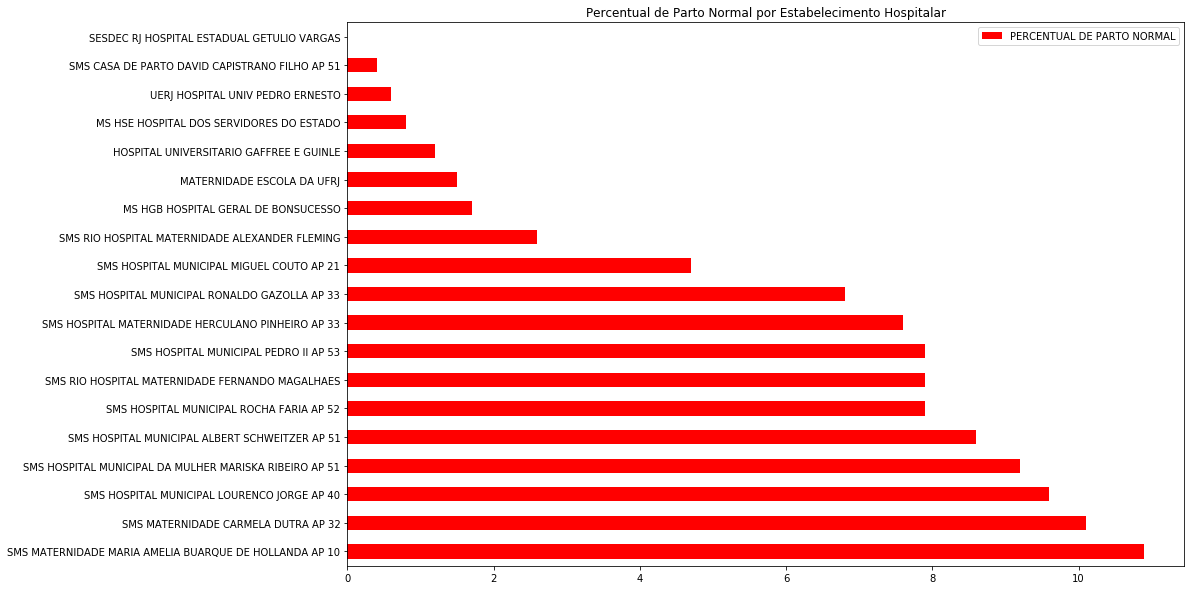

In [409]:
#Gráfico Quantidade de parto normal por estabelecimento
percentDados.plot(kind='barh', figsize=(15,10), color='red', title= 'Percentual de Parto Normal por Estabelecimento Hospitalar' )

In [420]:
normalparto['RACA_COR'].value_counts()*100/  43279

3     40.137249
2     23.734375
99    21.169620
1     14.223989
4      0.732457
5      0.002311
Name: RACA_COR, dtype: float64

In [400]:
normalparto.groupby(['IDADE', 'CATEGORIA'])['RACA_COR'].count()

RACA_COR  CATEGORIA    
1         CEGONHA           5697
          HUMANIZADO          67
          UNIVERSITARIO      392
2         CEGONHA          10010
          HUMANIZADO          31
          NAO CEGONHA          1
          UNIVERSITARIO      230
3         CEGONHA          16646
          HUMANIZADO          89
          NAO CEGONHA          2
          UNIVERSITARIO      634
4         CEGONHA            260
          HUMANIZADO           1
          UNIVERSITARIO       56
5         CEGONHA              1
99        CEGONHA           8732
          NAO CEGONHA        339
          UNIVERSITARIO       91
Name: RACA_COR, dtype: int64

In [192]:
normalparto.filter(items = ['IDADE']).where(normalparto['IDADE'] == 9).groupby(normalparto['RACA_COR']).count()

,IDADE
RACA_COR,
1,0
2,0
3,0
4,0
5,0
99,0


In [417]:
# De jan19 a junho20 houve 1288 partos normais de mulheres menores ou iguais a 15 anos de idade
normalparto.loc[normalparto['IDADE'] <= 15]

PROC_SOLIC         1288
CNES               1288
RACA_COR           1288
IDADE              1288
CEP                1288
ANO_CMPT           1288
MES_CMPT           1288
MUNICIPIO          1288
ESTABELECIMENTO    1288
LOGRADOURO         1288
NUMERO             1288
BAIRRO             1288
LATITUDE           1288
LONGITUDE          1288
CATEGORIA          1288
dtype: int64

In [159]:
# De jan19 a junho20 houve 42838 partos normais de mulheres maior de 15 anos 
dadosPartoNormal.loc[dadosPartoNormal['IDADE'] >= 15]

,CNES,RACA,IDADE,CEP,PROC_SOLIC,MUNICIPIO,ESTABELECIMENTO,LOGRADOURO,NUMERO,BAIRRO,LATITUDE,LONGITUDE,CATEGORIA
0,2295407,PRETA,19,23075570,310010039,RIO DE JANEIRO,SMS HOSPITAL MUNICIPAL ROCHA FARIA AP 52,AV CESARIO DE MELO,3215,CAMPO GRANDE,-22.90810,-43.56244,CEGONHA
1,2295407,BRANCA,21,23060210,310010039,RIO DE JANEIRO,SMS HOSPITAL MUNICIPAL ROCHA FARIA AP 52,AV CESARIO DE MELO,3215,CAMPO GRANDE,-22.90810,-43.56244,CEGONHA
2,2295407,PRETA,40,23085080,310010039,RIO DE JANEIRO,SMS HOSPITAL MUNICIPAL ROCHA FARIA AP 52,AV CESARIO DE MELO,3215,CAMPO GRANDE,-22.90810,-43.56244,CEGONHA
3,2295407,PRETA,28,23082060,310010039,RIO DE JANEIRO,SMS HOSPITAL MUNICIPAL ROCHA FARIA AP 52,AV CESARIO DE MELO,3215,CAMPO GRANDE,-22.90810,-43.56244,CEGONHA
4,2295407,PRETA,44,23082030,310010039,RIO DE JANEIRO,SMS HOSPITAL MUNICIPAL ROCHA FARIA AP 52,AV CESARIO DE MELO,3215,CAMPO GRANDE,-22.90810,-43.56244,CEGONHA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43275,2269880,NÃO DECLARADO,26,21042130,310010039,RIO DE JANEIRO,MS HGB HOSPITAL GERAL DE BONSUCESSO,LONDRES,616,BONSUCESSO,-22.86714,-43.24854,CEGONHA
43277,2269880,NÃO DECLARADO,25,21046695,310010039,RIO DE JANEIRO,MS HGB HOSPITAL GERAL DE BONSUCESSO,LONDRES,616,BONSUCESSO,-22.86714,-43.24854,CEGONHA
43278,2269880,NÃO DECLARADO,19,21046415,310010039,RIO DE JANEIRO,MS HGB HOSPITAL GERAL DE BONSUCESSO,LONDRES,616,BONSUCESSO,-22.86714,-43.24854,CEGONHA
43279,2269783,PRETA,31,21041040,310010039,RIO DE JANEIRO,UERJ HOSPITAL UNIV PEDRO ERNESTO,BOULEVARD 28 DE SETEMBRO,77,VILA ISABEL,-22.91428,-43.23704,UNIVERSITARIO


*Gráficos de partos normais por CNES*

Estes gráficos representam a distribuição racial e faixa etária dos CNES do mun_rio registrados por frequencia deste procedimento 

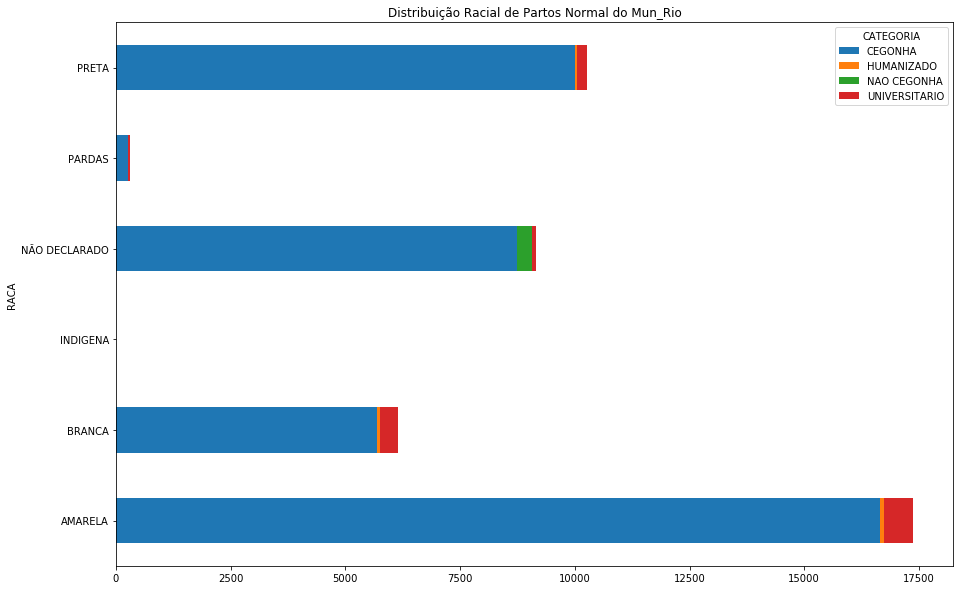

In [144]:
dadosPartoNormal2 = dadosPartoNormal.groupby(['RACA', 'CATEGORIA' ])['RACA'].count().unstack('CATEGORIA').fillna(0)
dadosPartoNormal2.plot(kind='barh', title= 'Distribuição Racial de Partos Normal do Mun_Rio', figsize=(15,10), 
                              stacked=True)

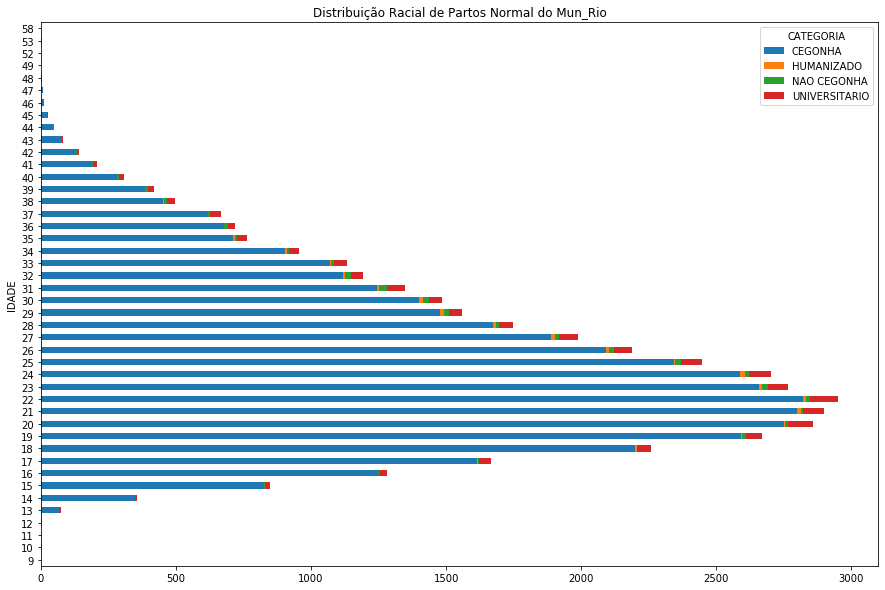

In [148]:
dadosPartoNormal3 = dadosPartoNormal.groupby(['IDADE', 'CATEGORIA'])['IDADE'].count().unstack('CATEGORIA').fillna(0)
dadosPartoNormal3.plot(kind='barh', title= 'Distribuição Racial de Partos Normal do Mun_Rio', figsize=(15,10), 
                              stacked=True)

***Conclusão:***

 De Janeiro 2019 a junho de 2020 foram feitos 43281 partos normais em mulheres com média de 25 anos e tendo feito esse procedimento em maioria de mulheres declaradas amarelas.
 
 *Rede Cegonha* é a categoria com maior número de partos normais *(41348)* seguido de *Hospitais Universitário (1403)*. *Casa de parto humanizado* teve nesse período *188 partos normais*.
 
 *Rede Cegonha* possui partos normais de mais mulheres declaradas *Amarela (16647)* seguida das declaradas *Preta(10010)*
 
 *Casa de parto* possui partos normais de mais mulheres declaradas *Amarela (89)* seguida das declaradas *Branca(67)*




##### - (cod.:0310010047) PARTO NORMAL EM GESTACAO DE ALTO RISCO   


In [196]:
# Criando um novo dataframe com apenas esse cód
normalAlt = sih.loc[sih['PROC_SOLIC'] == 310010047]


Entendendo o comportamento dos dados

In [197]:
normalAlt['PROC_SOLIC'].value_counts()

310010047    4310
Name: PROC_SOLIC, dtype: int64

In [200]:
normalAlt['IDADE'].mean()

26.509048723897912

In [199]:
normalAlt['RACA_COR'].value_counts()*100/ 4310

3     43.085847
99    22.412993
1     16.635731
2     15.707657
4      2.134571
5      0.023202
Name: RACA_COR, dtype: float64

In [203]:
# Na rede cegonha há mais partos normais de alto risco de  mulheres declaradas Amarelas seguida das que 
# não declararam raça na ficha do procedimento

normalAlt.groupby(['RACA_COR', 'CATEGORIA'])['RACA_COR'].count()*100/4310   #.plot(kind='barh') Caso queira visualizar em um gráfico

RACA_COR  CATEGORIA    
1         CEGONHA           7.354988
          UNIVERSITARIO     9.280742
2         CEGONHA          11.276102
          UNIVERSITARIO     4.431555
3         CEGONHA          24.013921
          UNIVERSITARIO    19.071926
4         CEGONHA           2.018561
          UNIVERSITARIO     0.116009
5         CEGONHA           0.023202
99        CEGONHA          22.320186
          NAO CEGONHA       0.023202
          UNIVERSITARIO     0.069606
Name: RACA_COR, dtype: float64

In [237]:
percentDadosAlt = pd.DataFrame(normalAlt['ESTABELECIMENTO'].value_counts())

In [238]:
percentDadosAlt['ESTABELECIMENTO'] = percentDadosAlt['ESTABELECIMENTO']*100/ 4310 


In [239]:
percentDadosAlt.rename(columns ={'ESTABELECIMENTO': 'PERCENTUAL DE PARTO'}, inplace=True)

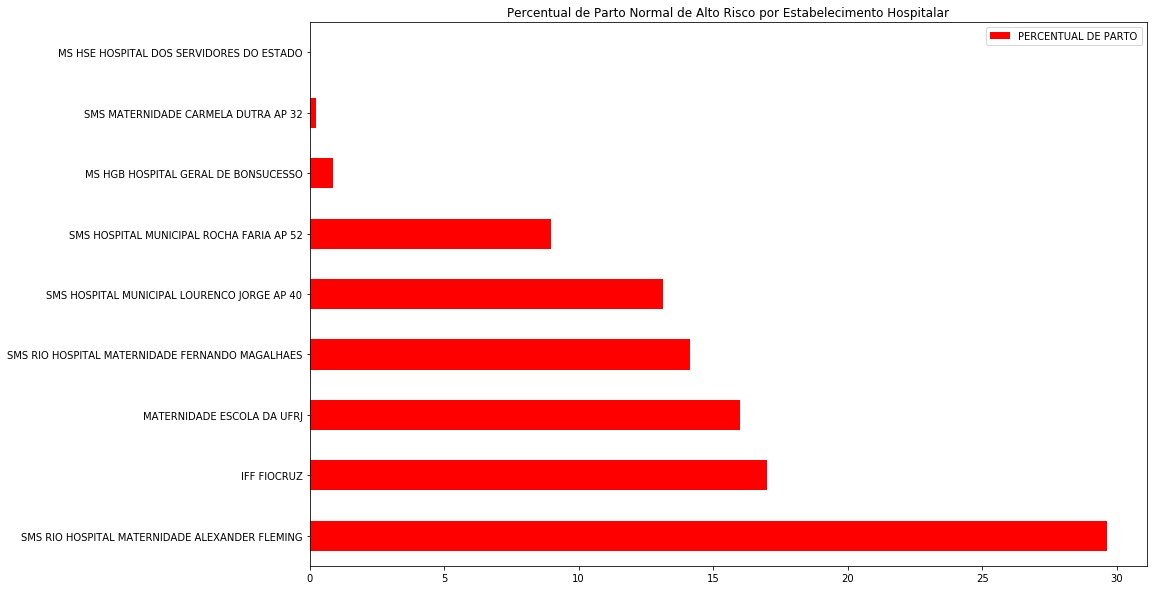

In [240]:
#Gráfico Quantidade de parto normal por estabelecimento
percentDadosAlt.plot(kind='barh', figsize=(15,10), color='red', title= 'Percentual de Parto Normal de Alto Risco por Estabelecimento Hospitalar' )

*Gráfico de partos normais em gestão de alto risco por CNES*

Este gráfico representa a distribuição racial dos CNES do mun_rio registrados por frequencia deste procedimento 

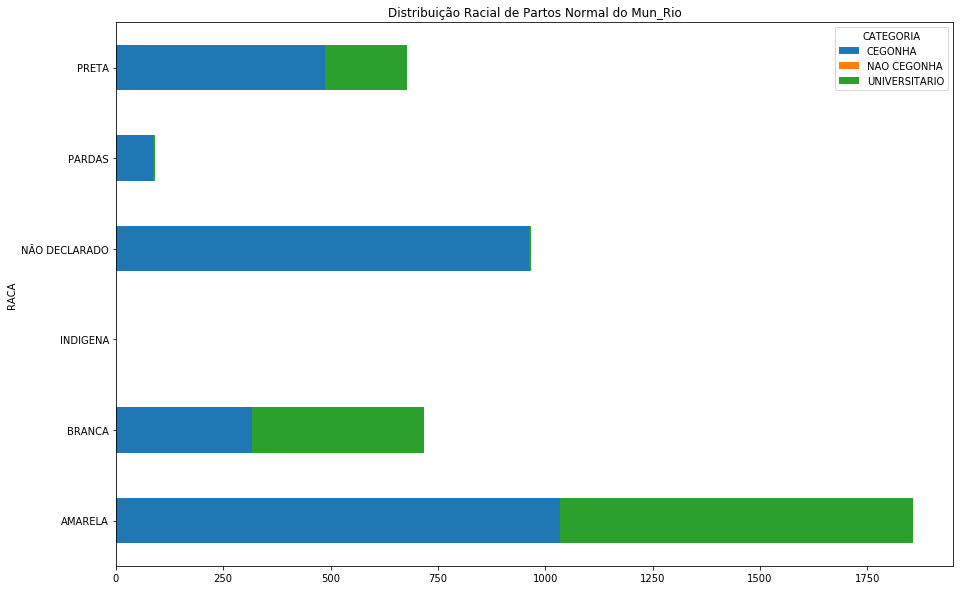

In [320]:
dadosPartoNormalAlt2 = dadosPartoNormalAlt.groupby(['RACA', 'CATEGORIA' ])['RACA'].count().unstack('CATEGORIA').fillna(0)
dadosPartoNormalAlt2.plot(kind='barh', title= 'Distribuição Racial de Partos Normal do Mun_Rio', figsize=(15,10), 
                              stacked=True)

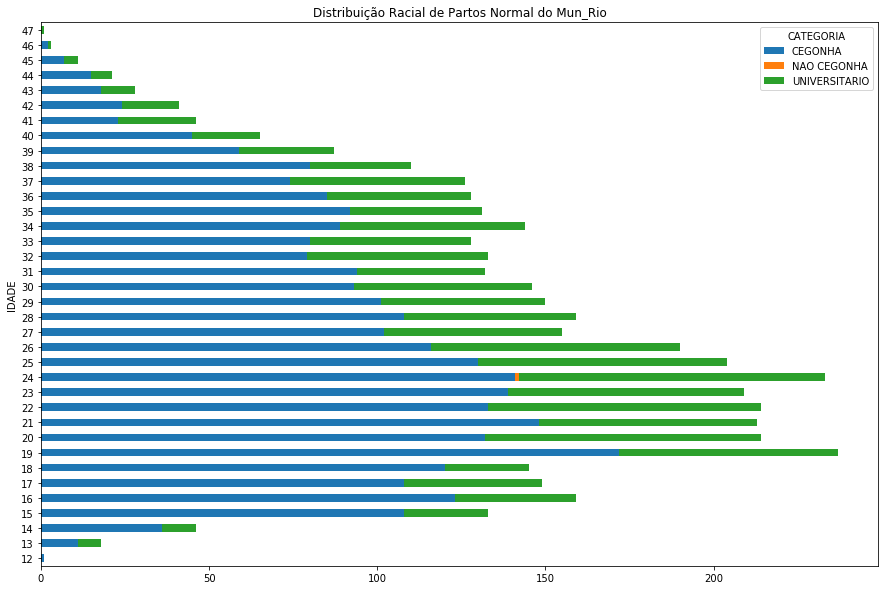

In [321]:
dadosPartoNormalAlt3 = dadosPartoNormalAlt.groupby(['IDADE', 'CATEGORIA'])['IDADE'].count().unstack('CATEGORIA').fillna(0)
dadosPartoNormalAlt3.plot(kind='barh', title= 'Distribuição Racial de Partos Normal do Mun_Rio', figsize=(15,10), 
                              stacked=True)

**Conclusão:**

De Janeiro 2019 a junho de 2020 foram feitos 4310 partos normais em mulheres com média de 26 anos e tendo feito esse procedimento em maioria de mulheres declaradas amarelas(43%)  seguida da não declaradas (22%).

Rede Cegonha é a categoria com maior número de partos normais de alto risco (67%) seguido de Hospitais Universitário (32.9%). Não cgonha teve apena 1 parto normal de alto risco

 24% dos partos normais de alto risco na Rede Cegonha foram feitos em mulheres declaradas Amarelas e 



 #####  - (cod.:0310010055) PARTO NORMAL EM CENTRO DE PARTO NORMAL (CPN) 
 
  Não teve nenhum registro no municipio do Rio do Janeiro

 ##### - (cod.:0411010026) PARTO CESARIANO EM GESTACAO DE ALTO RISCO  



In [241]:
cesarianaAl = sih.loc[sih['PROC_SOLIC'] == 411010026]

 Entendendo o comportamento dos dados

In [242]:
cesarianaAl['PROC_SOLIC'].value_counts()

411010026    5981
Name: PROC_SOLIC, dtype: int64

In [247]:
cesarianaAl['IDADE'].describe()

count    5981.000000
mean       28.102157
std         7.187324
min        13.000000
25%        22.000000
50%        28.000000
75%        34.000000
max        52.000000
Name: IDADE, dtype: float64

In [249]:
cesarianaAl['RACA_COR'].value_counts()*100/ 5981

3     37.652566
99    27.804715
2     18.608928
1     14.562782
4      1.354289
5      0.016720
Name: RACA_COR, dtype: float64

In [243]:
# Há mais partos csariano de alto risco na categoria Cegonha do que na Universitário(Hospitais)
cesarianaAl['CATEGORIA'].value_counts()*100/ 5981

CEGONHA          69.169035
UNIVERSITARIO    30.830965
Name: CATEGORIA, dtype: float64

In [245]:
# Há mais mulheres com raça não declarada fazendo cesarianas de alto risco na rede cegonha
# Já em hosp. Universitários mais mulheres amarelas fazem cesarianas de alto risco

cesarianaAl.groupby(['RACA_COR', 'CATEGORIA'])['RACA_COR'].count()*100/5981   #.plot(kind='barh') Caso queira visualizar em um gráfico

RACA_COR  CATEGORIA    
1         CEGONHA           6.102658
          UNIVERSITARIO     8.460124
2         CEGONHA          13.843839
          UNIVERSITARIO     4.765089
3         CEGONHA          20.331048
          UNIVERSITARIO    17.321518
4         CEGONHA           1.220532
          UNIVERSITARIO     0.133757
5         CEGONHA           0.016720
99        CEGONHA          27.654238
          UNIVERSITARIO     0.150477
Name: RACA_COR, dtype: float64

In [252]:
percentDadosCesAl = pd.DataFrame(cesarianaAl['ESTABELECIMENTO'].value_counts())
percentDadosCesAl['ESTABELECIMENTO'] = percentDadosCesAl['ESTABELECIMENTO']*100/5981


In [255]:
percentDadosCesAl

,PERCENTUAL DE PARTO
SMS HOSPITAL MUNICIPAL LOURENCO JORGE AP 40,24.176559
MATERNIDADE ESCOLA DA UFRJ,19.394750
SMS RIO HOSPITAL MATERNIDADE FERNANDO MAGALHAES,15.783314
SMS HOSPITAL MUNICIPAL ROCHA FARIA AP 52,15.248286
SMS RIO HOSPITAL MATERNIDADE ALEXANDER FLEMING,12.706905
IFF FIOCRUZ,11.436215
MS HGB HOSPITAL GERAL DE BONSUCESSO,1.036616
SMS MATERNIDADE CARMELA DUTRA AP 32,0.217355


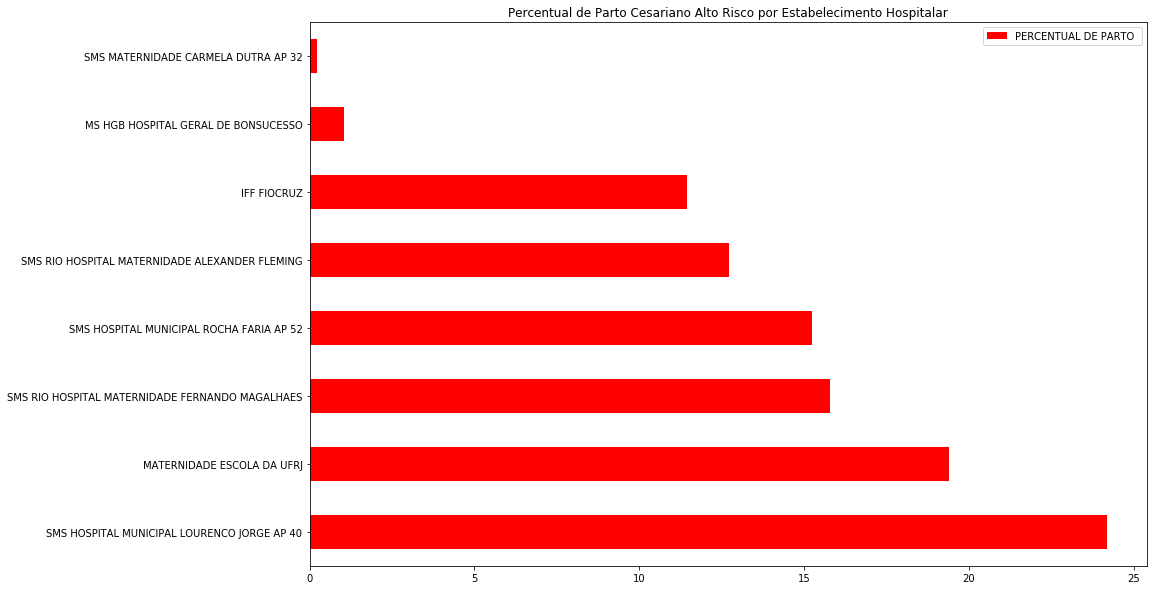

In [254]:
#Gráfico Quantidade de parto normal por estabelecimento
percentDadosCesAl.plot(kind='barh', figsize=(15,10), color='red', title= 'Percentual de Parto Cesariano Alto Risco por Estabelecimento Hospitalar' )

In [306]:
#tem mais mulheres declaradas amarela (19) menores de 15 anos tendo partos cesarianas de alto risco
#seguido das declaradas pretas (11)

dadosCesarianaAl.filter(items = ['IDADE']).where(dadosCesarianaAl['IDADE'] < 15 ).groupby(
                                   dadosCesarianaAl['RACA']).count()

,IDADE
RACA,
AMARELA,19
BRANCA,1
INDIGENA,0
NÃO DECLARADO,8
PARDAS,1
PRETA,11


In [312]:
# Rede Cegonha é a que mais faz parto cesarianos de alto risco em menores de 15 anos
dadosCesarianaAl.filter(items = ['IDADE']).where(dadosCesarianaAl['IDADE'] < 15 ).groupby(
                                   dadosCesarianaAl['CATEGORIA']).count()

,IDADE
CATEGORIA,
CEGONHA,30
UNIVERSITARIO,10


In [315]:
# Rede Cegonha é a que mais faz parto cesarianos em mulheres maiores de 15 anos
dadosCesarianaAl.filter(items = ['IDADE']).where(dadosCesarianaAl['IDADE'] > 15).groupby(
                                   dadosCesarianaAl['CATEGORIA']).count()

,IDADE
CATEGORIA,
CEGONHA,4048
UNIVERSITARIO,1821


*Gráfico de partos cesariana por CNES*

Este gráfico representa a distribuição racial dos CNES do mun_rio registrados por frequencia deste procedimento 

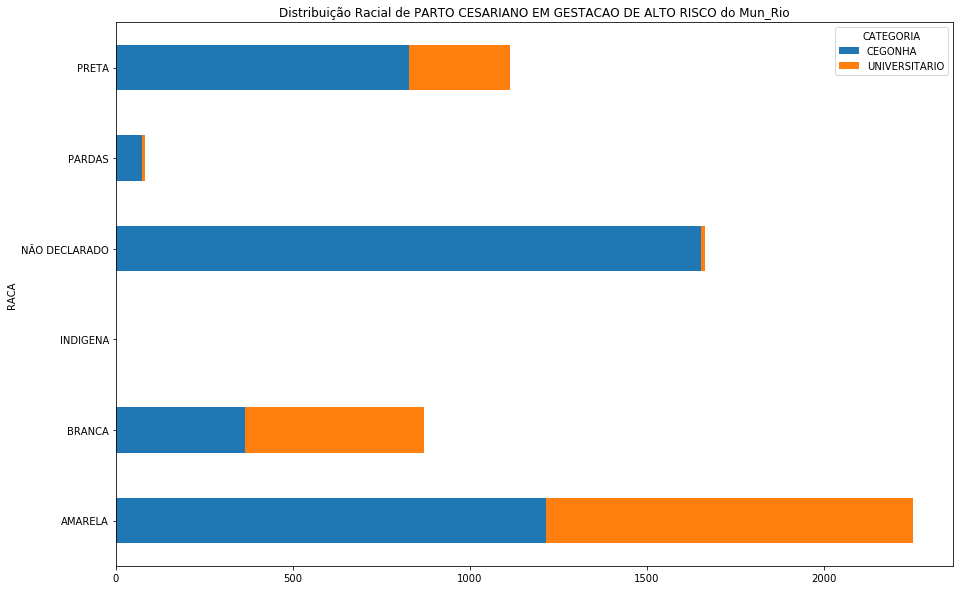

In [303]:
dadosCesarianaAl2 = dadosCesarianaAl.groupby(['RACA', 'CATEGORIA' ])['RACA'].count().unstack('CATEGORIA').fillna(0)
dadosCesarianaAl2.plot(kind='barh', title= 'Distribuição Racial de PARTO CESARIANO EM GESTACAO DE ALTO RISCO do Mun_Rio', figsize=(15,10), 
                              stacked=True)

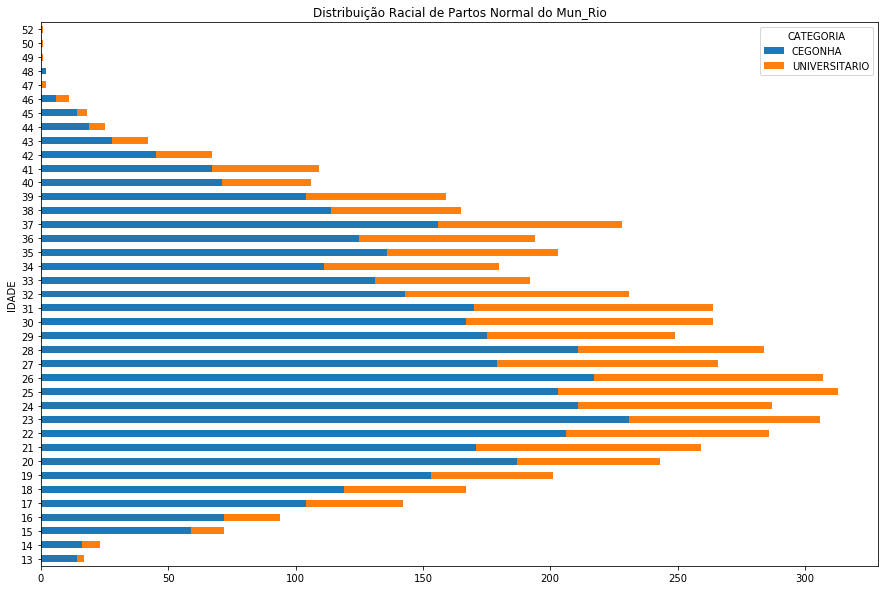

In [322]:
dadosCesarianaAl3 = dadosCesarianaAl.groupby(['IDADE', 'CATEGORIA'])['IDADE'].count().unstack('CATEGORIA').fillna(0)
dadosCesarianaAl3.plot(kind='barh', title= 'Distribuição Racial de Partos Normal do Mun_Rio', figsize=(15,10), 
                              stacked=True)

 **Conclusão:**

 ##### - (cod.:0411010034) PARTO CESARIANO  


In [209]:
cesariana = sih.loc[sih['PROC_SOLIC'] == 411010034]

In [210]:
cesariana['PROC_SOLIC'].value_counts()

411010034    15656
Name: PROC_SOLIC, dtype: int64

In [220]:
percentDadosCes = pd.DataFrame(cesariana['ESTABELECIMENTO'].value_counts())
percentDadosCes['ESTABELECIMENTO'] = percentDadosCes['ESTABELECIMENTO']*100/15656


In [230]:
percentDadosCes.rename(columns ={'ESTABELECIMENTO': 'PERCENTUAL DE PARTO '}, inplace=True)

In [232]:
percentDadosCes

,PERCENTUAL DE PARTO
SMS HOSPITAL MUNICIPAL DA MULHER MARISKA RIBEIRO AP 51,14.780276
SMS MATERNIDADE MARIA AMELIA BUARQUE DE HOLLANDA AP 10,11.874042
SMS HOSPITAL MUNICIPAL ALBERT SCHWEITZER AP 51,11.484415
SMS MATERNIDADE CARMELA DUTRA AP 32,9.938682
SMS HOSPITAL MUNICIPAL PEDRO II AP 53,8.859223
SMS HOSPITAL MUNICIPAL RONALDO GAZOLLA AP 33,8.488758
SMS HOSPITAL MATERNIDADE HERCULANO PINHEIRO AP 33,6.598109
SMS RIO HOSPITAL MATERNIDADE FERNANDO MAGALHAES,6.387328
SMS HOSPITAL MUNICIPAL MIGUEL COUTO AP 21,6.285130
SMS HOSPITAL MUNICIPAL ROCHA FARIA AP 52,5.148186


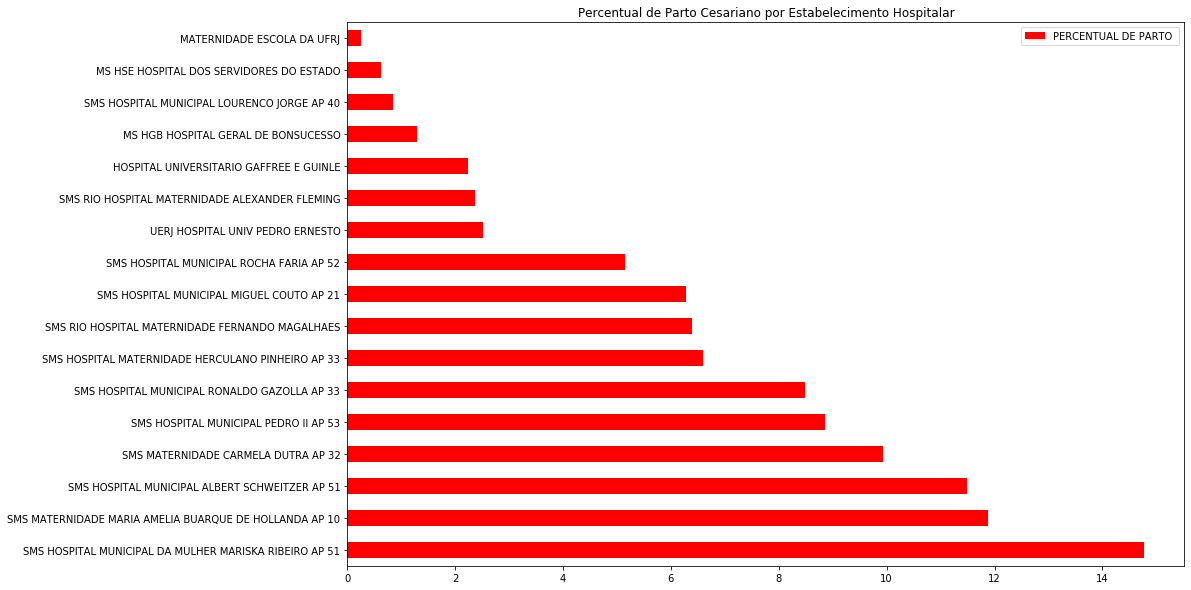

In [231]:
#Gráfico Quantidade de parto normal por estabelecimento
percentDadosCes.plot(kind='barh', figsize=(15,10), color='red', title= 'Percentual de Parto Cesariano por Estabelecimento Hospitalar' )

In [213]:
# Há mais mulheres declaradas amarelas que fazem cesariana (6419) seguida de declaradas pretas (3782) na rede cegonha

cesariana.groupby(['RACA_COR', 'CATEGORIA'])['RACA_COR'].count()*100/15656

RACA_COR  CATEGORIA    
1         CEGONHA          15.917220
          UNIVERSITARIO     1.513797
2         CEGONHA          24.156873
          NAO CEGONHA       0.006387
          UNIVERSITARIO     0.849515
3         CEGONHA          41.000255
          UNIVERSITARIO     1.865100
4         CEGONHA           0.517374
          UNIVERSITARIO     0.261880
99        CEGONHA          12.761880
          NAO CEGONHA       0.625958
          UNIVERSITARIO     0.523761
Name: RACA_COR, dtype: float64

In [217]:
# A média de idade de mulheres que fazem parto cesariana é de 27 anos
# A mulher mais nova tem 12 anos
# A mulher mais velhor tem 58 anos
# 75% da mulheres tem menos de 32 anos
cesariana['IDADE'].describe()

count    15656.000000
mean        26.975409
std          6.581836
min         12.000000
25%         22.000000
50%         26.000000
75%         32.000000
max         58.000000
Name: IDADE, dtype: float64

In [216]:
cesariana['RACA_COR'].value_counts()*100/15656

3     42.865355
2     25.012775
1     17.431017
99    13.911599
4      0.779254
Name: RACA_COR, dtype: float64

In [218]:
cesariana['CATEGORIA'].value_counts()*100/15656

CEGONHA          94.353602
UNIVERSITARIO     5.014052
NAO CEGONHA       0.632345
Name: CATEGORIA, dtype: float64

In [340]:
# o estabelecimento que mais faz partos cesarianos é Hosp. Municipal da Mulher Mariska Ribeiro
dadosCesariana['ESTABELECIMENTO'].value_counts()

SMS HOSPITAL MUNICIPAL DA MULHER MARISKA RIBEIRO AP 51    2314
SMS MATERNIDADE MARIA AMELIA BUARQUE DE HOLLANDA AP 10    1859
SMS HOSPITAL MUNICIPAL ALBERT SCHWEITZER AP 51            1798
SMS MATERNIDADE CARMELA DUTRA AP 32                       1556
SMS HOSPITAL MUNICIPAL PEDRO II AP 53                     1387
SMS HOSPITAL MUNICIPAL RONALDO GAZOLLA AP 33              1329
SMS HOSPITAL MATERNIDADE HERCULANO PINHEIRO AP 33         1033
SMS RIO HOSPITAL MATERNIDADE FERNANDO MAGALHAES           1000
SMS HOSPITAL MUNICIPAL MIGUEL COUTO AP 21                  984
SMS HOSPITAL MUNICIPAL ROCHA FARIA AP 52                   806
UERJ HOSPITAL UNIV PEDRO ERNESTO                           394
SMS RIO HOSPITAL MATERNIDADE ALEXANDER FLEMING             371
HOSPITAL UNIVERSITARIO GAFFREE E GUINLE                    350
MS HGB HOSPITAL GERAL DE BONSUCESSO                        203
SMS HOSPITAL MUNICIPAL LOURENCO JORGE AP 40                132
MS HSE HOSPITAL DOS SERVIDORES DO ESTADO               

 *Gráfico*

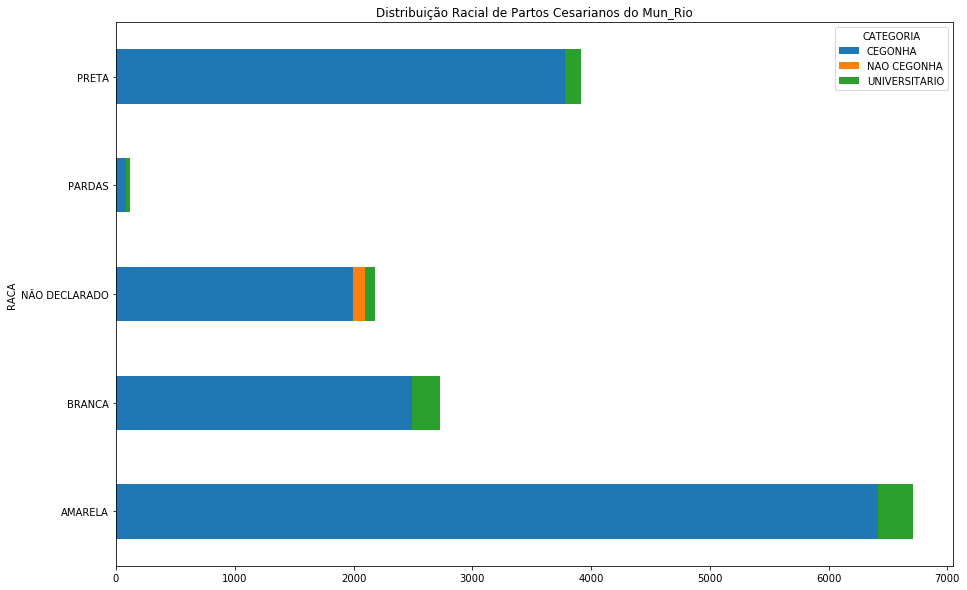

In [325]:
dadosCesariana2 = dadosCesariana.groupby(['RACA', 'CATEGORIA' ])['RACA'].count().unstack('CATEGORIA').fillna(0)
dadosCesariana2.plot(kind='barh', title= 'Distribuição Racial de Partos Cesarianos do Mun_Rio', figsize=(15,10), 
                              stacked=True)

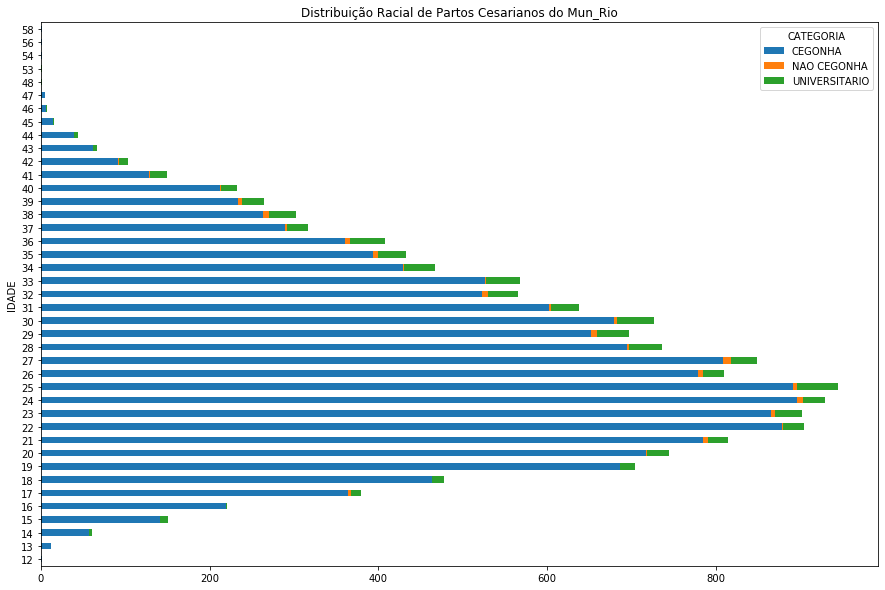

In [324]:
dadosCesariana3 = dadosCesariana.groupby(['IDADE', 'CATEGORIA'])['IDADE'].count().unstack('CATEGORIA').fillna(0)
dadosCesariana3.plot(kind='barh', title= 'Distribuição Racial de Partos Cesarianos do Mun_Rio', figsize=(15,10), 
                              stacked=True)

 ##### - (cod.:0411010042) PARTO CESARIANO COM LAQUEADURA TUBARIA   

In [256]:
laquiadura = sih.loc[sih['PROC_SOLIC'] == 411010042]

 ENTENDO O COMPORTAMENTO DOS DADOS

In [257]:
laquiadura['PROC_SOLIC'].value_counts()

411010042    2052
Name: PROC_SOLIC, dtype: int64

In [258]:
laquiadura['CATEGORIA'].value_counts()*100/2052

CEGONHA          88.206628
UNIVERSITARIO    11.793372
Name: CATEGORIA, dtype: float64

In [259]:
laquiadura['IDADE'].describe()

count    2052.000000
mean       31.689571
std         5.321055
min        17.000000
25%        27.000000
50%        31.000000
75%        36.000000
max        48.000000
Name: IDADE, dtype: float64

In [261]:
laquiadura['RACA_COR'].value_counts()*100/2052

3     45.662768
2     19.834308
1     17.007797
99    16.423002
4      1.072125
Name: RACA_COR, dtype: float64

In [262]:
laquiadura.groupby(['RACA_COR', 'CATEGORIA'])['RACA_COR'].count()*100/2052

RACA_COR  CATEGORIA    
1         CEGONHA          12.865497
          UNIVERSITARIO     4.142300
2         CEGONHA          18.274854
          UNIVERSITARIO     1.559454
3         CEGONHA          40.448343
          UNIVERSITARIO     5.214425
4         CEGONHA           0.730994
          UNIVERSITARIO     0.341131
99        CEGONHA          15.886940
          UNIVERSITARIO     0.536062
Name: RACA_COR, dtype: float64

In [287]:
percentDadosLaq = pd.DataFrame(laquiadura['ESTABELECIMENTO'].value_counts())
percentDadosLaq['ESTABELECIMENTO'] = percentDadosLaq['ESTABELECIMENTO']*100/2052

In [288]:
percentDadosLaq.rename(columns ={'ESTABELECIMENTO': 'PERCENTUAL DE LAQUEADURA '}, inplace=True)

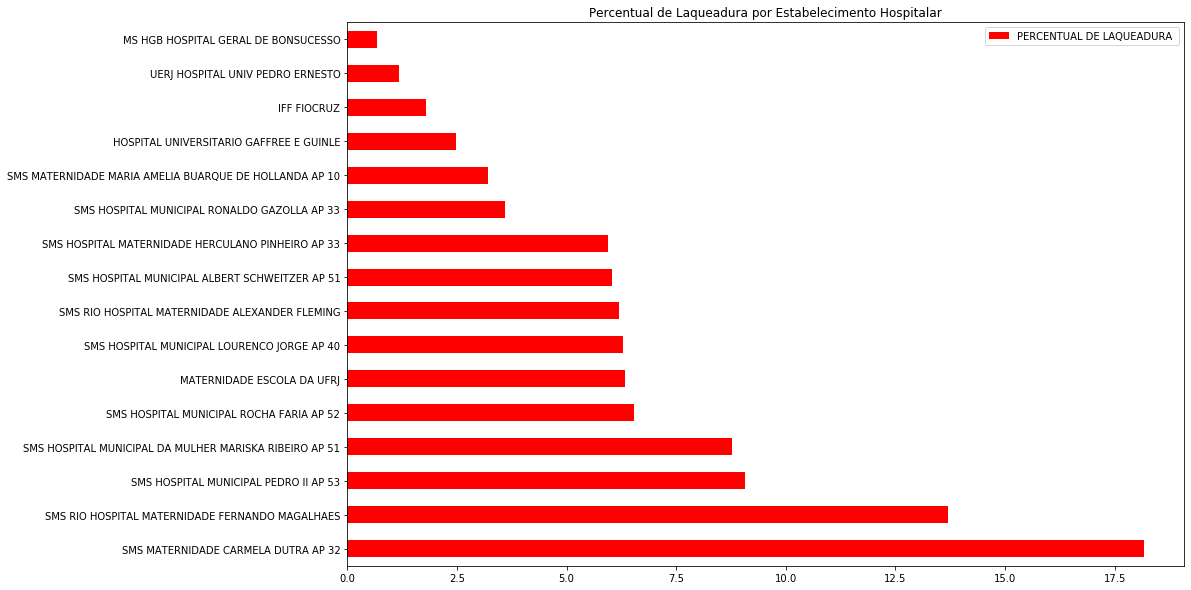

In [289]:
#Gráfico Quantidade de parto normal por estabelecimento
percentDadosLaq.plot(kind='barh', figsize=(15,10), color='red', title= 'Percentual de Laqueadura por Estabelecimento Hospitalar' )

 *Gráfico*

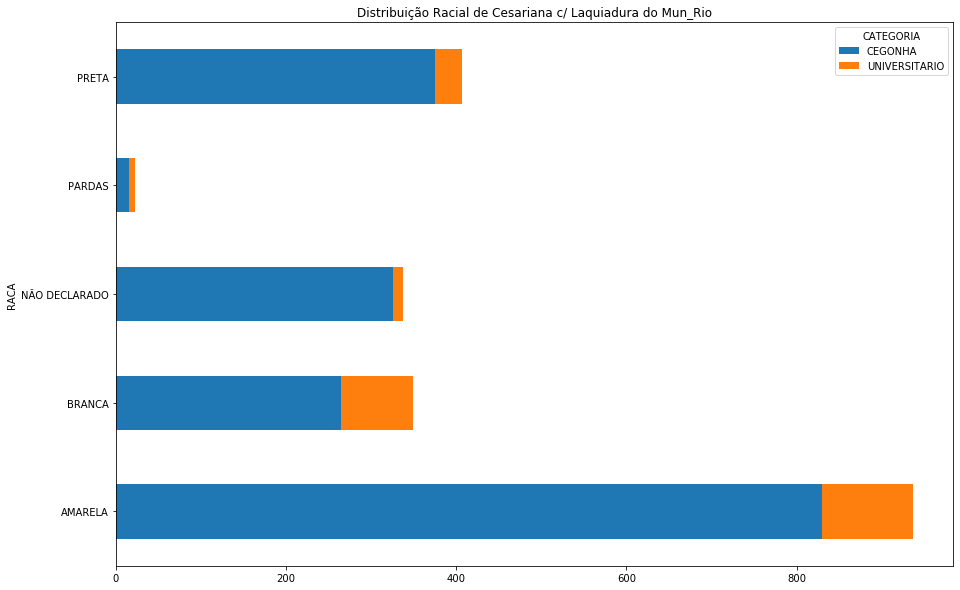

In [285]:
dadosLaquiadura2 = dadosLaquiadura.groupby(['RACA', 'CATEGORIA' ])['RACA'].count().unstack('CATEGORIA').fillna(0)
dadosLaquiadura2.plot(kind='barh', title= 'Distribuição Racial de Cesariana c/ Laquiadura do Mun_Rio', figsize=(15,10), 
                              stacked=True)

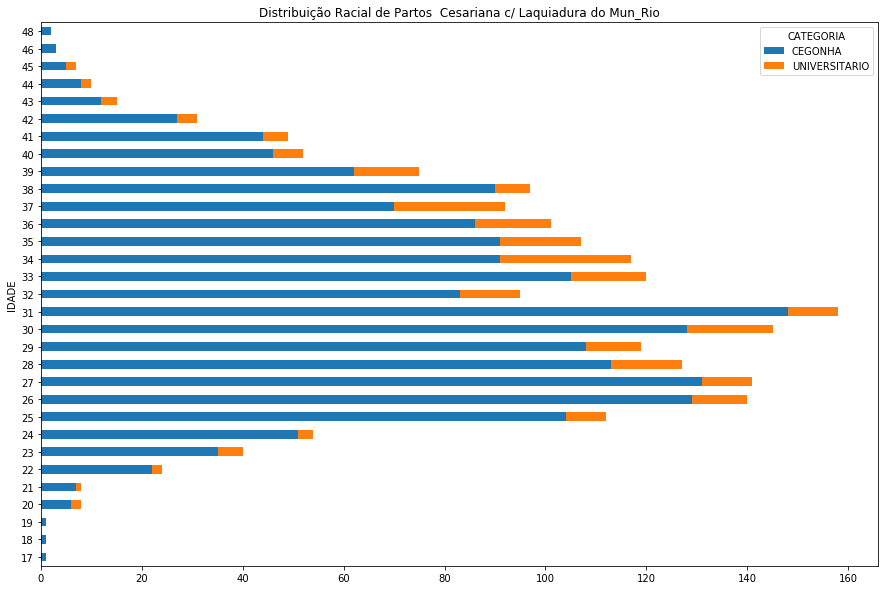

In [326]:
dadosLaquiadura3 = dadosLaquiadura.groupby(['IDADE', 'CATEGORIA'])['IDADE'].count().unstack('CATEGORIA').fillna(0)
dadosLaquiadura3.plot(kind='barh', title= 'Distribuição Racial de Partos  Cesariana c/ Laquiadura do Mun_Rio', figsize=(15,10), 
                              stacked=True)

 - (cod.:0411020048) TRATAMENTO CIRÚRGICO DE GRAVIDEZ ECTÓPICA   


In [269]:
ectopica = sih.loc[sih['PROC_SOLIC'] == 411020048] 

 Entendo o comportamento dos dados 

In [270]:
ectopica['PROC_SOLIC'].value_counts()

411020048    375
Name: PROC_SOLIC, dtype: int64

In [271]:
ectopica['CATEGORIA'].value_counts()*100/ 375

CEGONHA          86.933333
UNIVERSITARIO    12.800000
NAO CEGONHA       0.266667
Name: CATEGORIA, dtype: float64

In [272]:
ectopica['IDADE'].describe()

count    375.000000
mean      29.149333
std        6.348110
min       14.000000
25%       24.000000
50%       29.000000
75%       34.000000
max       47.000000
Name: IDADE, dtype: float64

In [274]:
ectopica['RACA_COR'].value_counts()*100/ 375

3     42.933333
99    33.866667
2     11.466667
1     10.933333
4      0.800000
Name: RACA_COR, dtype: float64

In [275]:
ectopica.groupby(['RACA_COR', 'CATEGORIA'])['RACA_COR'].count()*100/375

RACA_COR  CATEGORIA    
1         CEGONHA           8.266667
          UNIVERSITARIO     2.666667
2         CEGONHA           8.000000
          UNIVERSITARIO     3.466667
3         CEGONHA          37.333333
          UNIVERSITARIO     5.600000
4         CEGONHA           0.266667
          UNIVERSITARIO     0.533333
99        CEGONHA          33.066667
          NAO CEGONHA       0.266667
          UNIVERSITARIO     0.533333
Name: RACA_COR, dtype: float64

In [284]:
percentDadosEct = pd.DataFrame(ectopica['ESTABELECIMENTO'].value_counts())
percentDadosEct['ESTABELECIMENTO'] = percentDadosEct['ESTABELECIMENTO']*100/375

In [285]:
percentDadosEct.rename(columns ={'ESTABELECIMENTO': 'PERCENTUAL DE ECTÓPICA'}, inplace=True)

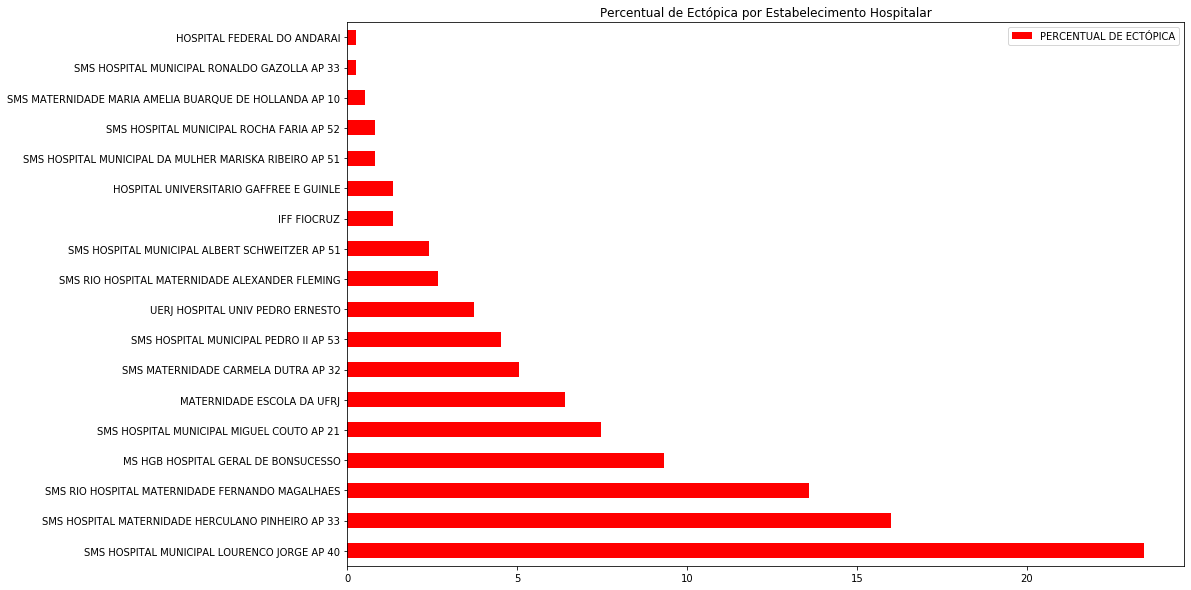

In [286]:
#Gráfico Quantidade de parto normal por estabelecimento
percentDadosEct.plot(kind='barh', figsize=(15,10), color='red', title= 'Percentual de Ectópica por Estabelecimento Hospitalar' )

 *Gráfico*

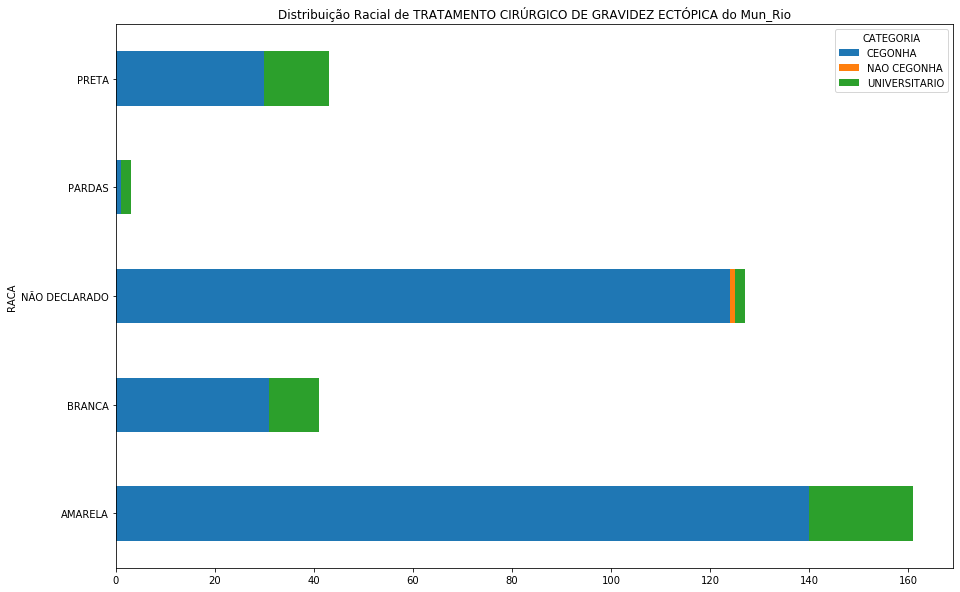

In [292]:
dadosEctopica2 = dadosEctopica.groupby(['RACA', 'CATEGORIA' ])['RACA'].count().unstack('CATEGORIA').fillna(0)
dadosEctopica2.plot(kind='barh', title= 'Distribuição Racial de TRATAMENTO CIRÚRGICO DE GRAVIDEZ ECTÓPICA do Mun_Rio', figsize=(15,10), 
                              stacked=True)

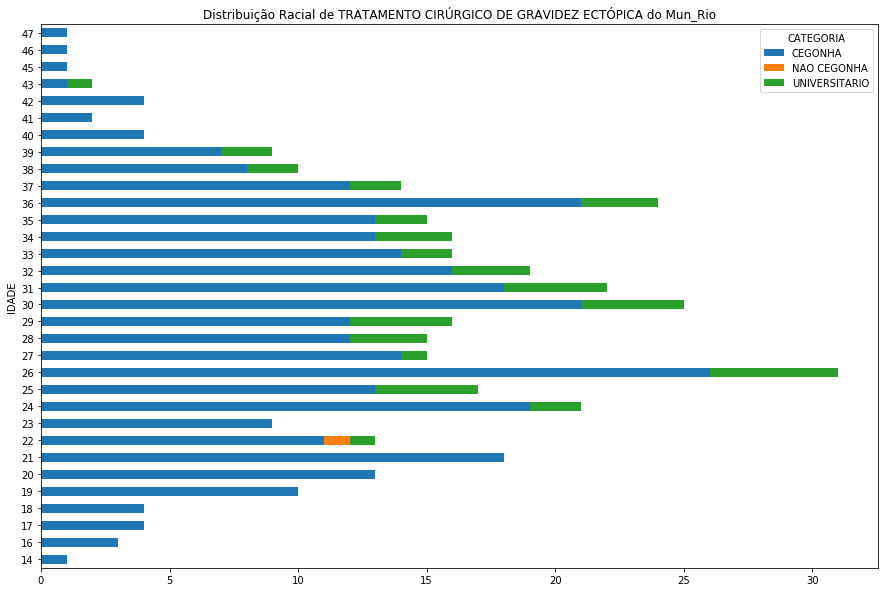

In [327]:
dadosEctopica3 = dadosEctopica.groupby(['IDADE', 'CATEGORIA'])['IDADE'].count().unstack('CATEGORIA').fillna(0)
dadosEctopica3.plot(kind='barh', title= 'Distribuição Racial de TRATAMENTO CIRÚRGICO DE GRAVIDEZ ECTÓPICA do Mun_Rio', figsize=(15,10), 
                              stacked=True)

 - (cod.:021401004) TESTE RÁPIDO PARA DETECÇÃO DE HIV EM GESTANTE
 
 Não tem esse registro em 2019 no SIH
   